In [1]:
import lxml
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from matplotlib import pyplot
import matplotlib
import seaborn as sns
import re
import math
import statsmodels
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import umap

C:\Users\jymbc\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\jymbc\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


# read case2 proteome dataset and dysregulation analysis

In [2]:
file_save_path = r'F:\SMAD PROJECT\96well_casestudy2\files'
figure_save_path = r'F:\SMAD PROJECT\96well_casestudy2\figures'

In [3]:

df_pro = pd.read_csv(f'{file_save_path}\commonProteins.csv',index_col=0)

In [4]:
df_pro

,1/contam_sp|P00761|TRYP_PIG,1/contam_sp|P02769|ALBU_BOVIN,1/sp|A6NHQ2|FBLL1_HUMAN,1/sp|A8MXV4|NUD19_HUMAN,1/sp|A9QM74|IMA8_HUMAN,1/sp|E9PRG8|CK098_HUMAN,1/sp|O00148|DX39A_HUMAN,1/sp|O00151|PDLI1_HUMAN,1/sp|O00154|BACH_HUMAN,1/sp|O00170|AIP_HUMAN,...,4/sp|P19367|HXK1_HUMAN/sp|P52789|HXK2_HUMAN/sp|P52790|HXK3_HUMAN/sp|Q2TB90|HKDC1_HUMAN,4/sp|P51668|UB2D1_HUMAN/sp|P61077|UB2D3_HUMAN/sp|P62837|UB2D2_HUMAN/sp|Q9Y2X8|UB2D4_HUMAN,4/sp|P68431|H31_HUMAN/sp|P84243|H33_HUMAN/sp|Q16695|H31T_HUMAN/sp|Q71DI3|H32_HUMAN,4/sp|Q04724|TLE1_HUMAN/sp|Q04725|TLE2_HUMAN/sp|Q04726|TLE3_HUMAN/sp|Q04727|TLE4_HUMAN,5/sp|A6NKT7|RGPD3_HUMAN/sp|P0DJD0|RGPD1_HUMAN/sp|P0DJD1|RGPD2_HUMAN/sp|P49792|RBP2_HUMAN/sp|Q7Z3J3|RGPD4_HUMAN,5/sp|P02042|HBD_HUMAN/sp|P02100|HBE_HUMAN/sp|P68871|HBB_HUMAN/sp|P69891|HBG1_HUMAN/sp|P69892|HBG2_HUMAN,5/sp|P02585|TNNC2_HUMAN/sp|P0DP23|CALM1_HUMAN/sp|P0DP24|CALM2_HUMAN/sp|P0DP25|CALM3_HUMAN/sp|P27482|CALL3_HUMAN,5/sp|P68363|TBA1B_HUMAN/sp|P68366|TBA4A_HUMAN/sp|Q9BQE3|TBA1C_HUMAN/sp|Q9H853|TBA4B_HUMAN/sp|Q9NY65|TBA8_HUMAN,6/sp|P04350|TBB4A_HUMAN/sp|P07437|TBB5_HUMAN/sp|P68371|TBB4B_HUMAN/sp|Q13509|TBB3_HUMAN/sp|Q13885|TBB2A_HUMAN/sp|Q9BVA1|TBB2B_HUMAN,9/sp|O60814|H2B1K_HUMAN/sp|P57053|H2BFS_HUMAN/sp|P58876|H2B1D_HUMAN/sp|P62807|H2B1C_HUMAN/sp|Q5QNW6|H2B2F_HUMAN/sp|Q93079|H2B1H_HUMAN/sp|Q99877|H2B1N_HUMAN/sp|Q99879|H2B1M_HUMAN/sp|Q99880|H2B1L_HUMAN
zoDIAq-file_BA1_corrected_fullOutput,8.513358e+05,932750.702834,47094.639784,0.0,29987.073974,0.0,0.000000,0.000000,21758.594760,0.000000,...,0.0,0.0,668251.750378,0.0,0.0,195553.255858,0.000000,0.0,0.0,3.147912e+06
zoDIAq-file_BA2_corrected_fullOutput,5.658872e+05,809463.663952,45178.520825,0.0,25029.902344,0.0,242308.674968,7170.382202,23131.634953,0.000000,...,0.0,0.0,947322.246118,0.0,0.0,136406.745116,0.000000,0.0,0.0,2.303253e+06
zoDIAq-file_BA3_corrected_fullOutput,8.883312e+05,890406.707939,64224.188818,0.0,34747.996094,0.0,294599.792196,0.000000,30724.084554,0.000000,...,0.0,0.0,832865.575044,0.0,0.0,153832.054198,0.000000,0.0,0.0,3.254407e+06
zoDIAq-file_BA4_corrected_fullOutput,9.685072e+05,602091.524673,45453.725720,0.0,28726.933105,0.0,282137.875497,0.000000,30229.922293,29241.308594,...,0.0,0.0,0.000000,0.0,0.0,168407.874022,0.000000,0.0,0.0,2.669836e+06
zoDIAq-file_BA5_corrected_fullOutput,8.127822e+05,747980.807309,58214.077798,0.0,25736.037598,0.0,288586.848273,0.000000,34440.617727,0.000000,...,0.0,0.0,841567.176273,0.0,0.0,146192.789550,0.000000,0.0,0.0,2.530227e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoDIAq-file_BG8_corrected_fullOutput,1.121891e+06,773787.063344,35062.051974,0.0,22863.553711,0.0,0.000000,0.000000,17491.022521,0.000000,...,0.0,0.0,398535.686101,0.0,0.0,191627.039061,0.000000,0.0,0.0,1.335694e+06
zoDIAq-file_BG9_corrected_fullOutput,4.690474e+05,443909.574835,23034.687798,0.0,16559.395752,0.0,0.000000,2360.432373,14721.694493,0.000000,...,0.0,0.0,334028.349690,0.0,0.0,146199.141600,85636.488282,0.0,0.0,9.197665e+05
zoDIAq-file_BG10_corrected_fullOutput,7.196656e+05,486947.458875,0.000000,0.0,17114.274902,0.0,0.000000,0.000000,12978.768414,0.000000,...,0.0,0.0,392819.926671,0.0,0.0,143636.792479,86953.919923,0.0,0.0,1.081977e+06
zoDIAq-file_BG11_corrected_fullOutput,8.216290e+05,898890.213946,37267.533628,0.0,26610.411377,0.0,0.000000,0.000000,18921.703902,0.000000,...,0.0,0.0,425162.874935,0.0,0.0,216138.880858,131085.192873,0.0,0.0,1.545475e+06


In [4]:
df = df_pro.copy()

In [7]:
df0 = df_pro.T.replace(0,np.nan)

df1 = np.log2(filter_row_missings(df0,df0.shape[1]/1.5))
# df1 = filter_row_missings(df,df.shape[1]/2)
# df2 = df1.copy()

df2 = df1.drop(columns = ['zoDIAq-file_BD8_corrected_fullOutput'])
df3 = knn_imputer(df2, neighbors = 4)
# df3.columns = [item.split("_")[1] for item in df3.columns]


df3.columns = ['con_1', 'con_2', 'con_3', 'con_4', 'con_5', 'con_6', 'con_8', 'con_9', 'con_10', 'con_11','con_12', 
             'dmso_1', 'dmso_2', 'dmso_3', 'dmso_4', 'dmso_5', 'dmso_6', 'dmso_7', 'dmso_8', 'dmso_9', 'dmso_10', 'dmso_11', 'dmso_12', 
             'dfo_1', 'dfo_2', 'dfo_3', 'dfo_4', 'dfo_5', 'dfo_6', 'dfo_7', 'dfo_8', 'dfo_9', 'dfo_10', 'dfo_11', 'dfo_12', 
             'tori_1', 'tori_2', 'tori_3', 'tori_4', 'tori_5', 'tori_6', 'tori_7', 'tori_9', 'tori_10','tori_11', 'tori_12', 
             'isrib_1', 'isrib_2', 'isrib_3', 'isrib_4', 'isrib_5', 'isrib_6', 'isrib_7', 'isrib_8', 'isrib_9', 'isrib_10', 'isrib_11', 'isrib_12', 
             'a9395_1', 'a9395_2', 'a9395_3', 'a9395_4', 'a9395_5', 'a9395_6', 'a9395_7', 'a9395_8', 'a9395_9', 'a9395_10', 'a9395_11', 'a9395_12',     
             'mg132_1', 'mg132_2', 'mg132_3', 'mg132_4', 'mg132_5', 'mg132_6', 'mg132_7', 'mg132_8', 'mg132_9', 'mg132_10', 'mg132_11', 'mg132_12']
df3

,con_1,con_2,con_3,con_4,con_5,con_6,con_8,con_9,con_10,con_11,...,mg132_3,mg132_4,mg132_5,mg132_6,mg132_7,mg132_8,mg132_9,mg132_10,mg132_11,mg132_12
1/contam_sp|P00761|TRYP_PIG,19.699369,19.110155,19.760738,19.885403,19.632509,18.943449,19.388940,19.830434,20.440883,19.967908,...,20.270550,19.759082,20.122983,19.768343,20.218668,20.097501,18.839374,19.456967,19.648128,19.478417
1/contam_sp|P02769|ALBU_BOVIN,19.831132,19.626607,19.764105,19.199623,19.512642,19.306357,19.295732,19.389746,19.271840,19.748612,...,19.206387,19.046243,19.206462,19.665247,19.953615,19.561577,18.759906,18.893407,19.777785,18.678169
1/sp|A6NHQ2|FBLL1_HUMAN,15.523275,15.463349,15.970829,15.472111,15.829080,15.616693,14.731649,14.735600,15.791092,14.896838,...,14.911681,15.038077,14.987687,15.415220,15.309761,15.097623,14.491520,14.297122,15.185632,14.972028
1/sp|A9QM74|IMA8_HUMAN,14.872053,14.611365,15.084642,14.810116,14.651502,14.279246,14.702744,14.772855,14.610020,14.516733,...,14.724484,14.452752,14.257066,14.783270,15.101074,14.480762,14.015362,14.062913,14.699703,14.262112
1/sp|O00148|DX39A_HUMAN,17.882666,17.886487,18.168397,18.106041,18.138646,17.781747,17.857007,17.891480,17.934795,17.898092,...,17.035983,17.114820,17.144097,17.347395,17.287379,17.068814,16.745472,16.743593,17.182542,17.085103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/sp|P18085|ARF4_HUMAN/sp|P61204|ARF3_HUMAN/sp|P84077|ARF1_HUMAN/sp|P84085|ARF5_HUMAN,14.399106,14.406841,14.681096,14.001124,14.586373,14.496036,14.575667,14.031138,14.693282,14.353364,...,13.830359,13.751566,13.697478,14.047170,14.214051,14.127628,13.351913,13.407797,14.052462,13.723584
4/sp|P68431|H31_HUMAN/sp|P84243|H33_HUMAN/sp|Q16695|H31T_HUMAN/sp|Q71DI3|H32_HUMAN,19.350032,19.853496,19.667724,19.751313,19.682719,19.947177,19.562474,19.684676,19.619190,20.008644,...,18.507009,18.578025,18.644421,18.354535,18.278161,18.604349,18.349611,18.583509,18.697656,18.448779
5/sp|P02042|HBD_HUMAN/sp|P02100|HBE_HUMAN/sp|P68871|HBB_HUMAN/sp|P69891|HBG1_HUMAN/sp|P69892|HBG2_HUMAN,17.577202,17.057555,17.230997,17.361600,17.157513,17.054821,17.213731,17.577098,17.358837,17.264163,...,17.222467,17.293397,17.343996,17.792124,17.774266,17.547942,17.157575,17.132066,17.721599,16.872547
5/sp|P02585|TNNC2_HUMAN/sp|P0DP23|CALM1_HUMAN/sp|P0DP24|CALM2_HUMAN/sp|P0DP25|CALM3_HUMAN/sp|P27482|CALL3_HUMAN,17.883497,17.836993,18.269040,17.987705,18.045073,17.704619,17.940006,17.792975,17.879275,17.760886,...,16.506579,16.849247,16.917060,17.175027,17.218736,16.837814,16.385938,16.407963,17.000145,16.917292


In [16]:
df0

,zoDIAq-file_BA1_corrected_fullOutput,zoDIAq-file_BA2_corrected_fullOutput,zoDIAq-file_BA3_corrected_fullOutput,zoDIAq-file_BA4_corrected_fullOutput,zoDIAq-file_BA5_corrected_fullOutput,zoDIAq-file_BA6_corrected_fullOutput,zoDIAq-file_BA8_corrected_fullOutput,zoDIAq-file_BA9_corrected_fullOutput,zoDIAq-file_BA10_corrected_fullOutput,zoDIAq-file_BA11_corrected_fullOutput,...,zoDIAq-file_BG3_corrected_fullOutput,zoDIAq-file_BG4_corrected_fullOutput,zoDIAq-file_BG5_corrected_fullOutput,zoDIAq-file_BG6_corrected_fullOutput,zoDIAq-file_BG7_corrected_fullOutput,zoDIAq-file_BG8_corrected_fullOutput,zoDIAq-file_BG9_corrected_fullOutput,zoDIAq-file_BG10_corrected_fullOutput,zoDIAq-file_BG11_corrected_fullOutput,zoDIAq-file_BG12_corrected_fullOutput
1/contam_sp|P00761|TRYP_PIG,8.513358e+05,5.658872e+05,8.883312e+05,9.685072e+05,8.127822e+05,5.041345e+05,6.865188e+05,9.322995e+05,1.423373e+06,1.025509e+06,...,1.264863e+06,8.873119e+05,1.141882e+06,8.930261e+05,1.220184e+06,1.121891e+06,469047.365208,7.196656e+05,8.216290e+05,7.304454e+05
1/contam_sp|P02769|ALBU_BOVIN,9.327507e+05,8.094637e+05,8.904067e+05,6.020915e+05,7.479808e+05,6.483248e+05,6.435677e+05,6.869027e+05,6.329973e+05,8.808960e+05,...,6.049211e+05,5.413652e+05,6.049524e+05,8.314369e+05,1.015398e+06,7.737871e+05,443909.574835,4.869475e+05,8.988902e+05,4.194586e+05
1/sp|A6NHQ2|FBLL1_HUMAN,4.709464e+04,4.517852e+04,6.422419e+04,4.545373e+04,5.821408e+04,5.024503e+04,2.720623e+04,2.728083e+04,5.670123e+04,3.050669e+04,...,3.082218e+04,3.364435e+04,3.248952e+04,4.369618e+04,4.061600e+04,3.506205e+04,23034.687798,NaN,3.726753e+04,3.213880e+04
1/sp|A8MXV4|NUD19_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/sp|A9QM74|IMA8_HUMAN,2.998707e+04,2.502990e+04,3.474800e+04,2.872693e+04,2.573604e+04,1.988297e+04,2.666655e+04,2.799448e+04,2.500658e+04,2.344078e+04,...,2.707145e+04,2.242394e+04,1.957963e+04,2.819731e+04,3.514602e+04,2.286355e+04,16559.395752,1.711427e+04,2.661041e+04,1.964823e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/sp|P02042|HBD_HUMAN/sp|P02100|HBE_HUMAN/sp|P68871|HBB_HUMAN/sp|P69891|HBG1_HUMAN/sp|P69892|HBG2_HUMAN,1.955533e+05,1.364067e+05,1.538321e+05,1.684079e+05,1.461928e+05,1.361485e+05,1.520020e+05,1.955392e+05,1.680857e+05,1.574095e+05,...,1.529253e+05,1.606317e+05,1.663654e+05,2.269671e+05,2.241749e+05,1.916270e+05,146199.141600,1.436368e+05,2.161389e+05,1.199894e+05
5/sp|P02585|TNNC2_HUMAN/sp|P0DP23|CALM1_HUMAN/sp|P0DP24|CALM2_HUMAN/sp|P0DP25|CALM3_HUMAN/sp|P27482|CALL3_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.310555e+04,1.180670e+05,NaN,1.479784e+05,1.525302e+05,NaN,85636.488282,8.695392e+04,1.310852e+05,1.237692e+05
5/sp|P68363|TBA1B_HUMAN/sp|P68366|TBA4A_HUMAN/sp|Q9BQE3|TBA1C_HUMAN/sp|Q9H853|TBA4B_HUMAN/sp|Q9NY65|TBA8_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6/sp|P04350|TBB4A_HUMAN/sp|P07437|TBB5_HUMAN/sp|P68371|TBB4B_HUMAN/sp|Q13509|TBB3_HUMAN/sp|Q13885|TBB2A_HUMAN/sp|Q9BVA1|TBB2B_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


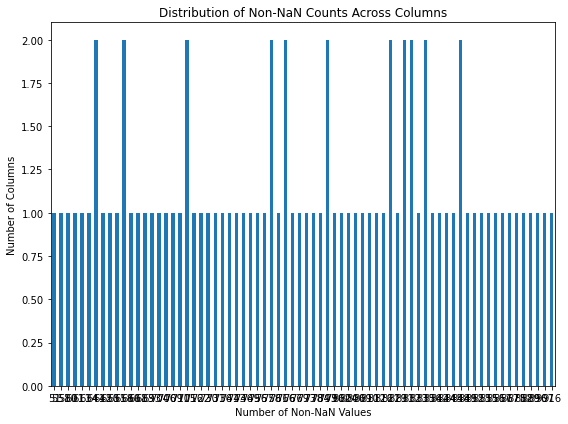

In [15]:
# Count non-NaN values per column
not_nan_counts = df0.notna().sum()

# Plot histogram: x-axis is count of non-NaNs, y-axis is number of columns with that count
plt.figure(figsize=(8, 6))
not_nan_counts.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of Non-NaN Values')
plt.ylabel('Number of Columns')
plt.title('Distribution of Non-NaN Counts Across Columns')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [6]:
def get_co_index(list1,list2):
    set1 = set(list1)
    set2 = set(list2)
    intersection = set1 & set2
    return list(intersection)

def knn_imputer(df, neighbors = 6):
    '''apply KNN imputation to a dataset'''
    from sklearn.impute import KNNImputer

    # Initialize the KNNImputer
    imputer = KNNImputer(n_neighbors = neighbors)
    
    imputed_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns, index=df.index)
    return imputed_df

def iterative_imputer(df, maxiteration = 10 , randomstates = 0):
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer

    # Initialize the IterativeImputer
    imputer = IterativeImputer(max_iter= maxiteration, random_state= randomstates)

    # Create a new DataFrame with the imputed values
    imputed_df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns, index=df.index)
    return imputed_df

def standardscaler(df):   
 
    # # Initialize the StandardScaler
    scaler = StandardScaler()
    # Fit and transform the data according to rows
    scaled_data = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)
    return scaled_df

def calculate_mean(df):
    # Calculate mean values for each group of columns
    mean_T1 = df.iloc[:, 0:6].mean(axis=1)
    mean_T2 = df.iloc[:, 6:12].mean(axis=1)
    mean_T3 = df.iloc[:, 12:18].mean(axis=1)
    mean_T4 = df.iloc[:, 18:24].mean(axis=1)
    # Create a new DataFrame with the calculated means
    new_df = pd.DataFrame({
        'T1': mean_T1,
        'T2': mean_T2,
        'T3': mean_T3,
        'T4': mean_T4
    })
    return new_df

def filter_row_missings(df, numisrib_r):
    '''Filter protein features and keep proteins with less than "numisrib_r" missing values, protein features as index.'''
    # Using isna() to count missing values and keep rows with missing values less than "numisrib_r"
    df_filtered = df[df.isna().sum(axis=1) <= numisrib_r]
    return df_filtered

def filter_column_missings(df, value):
    '''Filter samples and keep samples with more than "value" protein identifications, samples as columns.'''
    # Using notna() to count non-missing values and keep columns with non-missing values more than "value"
    df_filtered = df.loc[:, df.notna().sum(axis=0) >= value]
    return df_filtered
    
# function for oneway_ANOVA analysis 
def oneway_ANOVA(result=df):
    pval=[]
    for i in range(len(result)):
        aa=result.iloc[i,:11].tolist()
        dmso_=result.iloc[i,11:23].tolist()
        cc=result.iloc[i,23:35].tolist()
        dd=result.iloc[i,35:46].tolist() 
        ee=result.iloc[i,46:58].tolist()
        ff=result.iloc[i,58:70].tolist()
        gg=result.iloc[i,70:82].tolist()
        p_value=f_oneway(aa,dmso_,cc,dd,ee,ff,gg)[1]
        pval.append([result.index[i],p_value])
        fl = pd.DataFrame(pval)
        fl.columns = ['molecule', 'p_value_anova']
    return(fl)

# 按行进行标准归一化
def standardscaler_row(df):
    scaler=StandardScaler()
    proname=df.T.columns
    k=df.T
    dfdf_pro=scaler.fit_transform(k)
    # 按行进行标准化后的 dataframe
    dfpro_stdbyrow=pd.DataFrame(dfdf_pro.T,index=df.index,columns=df.columns)
    return dfpro_stdbyrow

In [8]:
df4 = standardscaler(df3)
# df4.to_csv(f'{file_save_path}\\all_proteins_after_SSnormalization.csv')

In [9]:
df4

,con_1,con_2,con_3,con_4,con_5,con_6,con_8,con_9,con_10,con_11,...,mg132_3,mg132_4,mg132_5,mg132_6,mg132_7,mg132_8,mg132_9,mg132_10,mg132_11,mg132_12
1/contam_sp|P00761|TRYP_PIG,2.532908,2.189840,2.402998,2.585209,2.399456,2.125986,2.320653,2.657386,2.960264,2.673952,...,3.479460,3.063349,3.314589,2.922318,3.090448,3.271288,2.758575,3.049882,2.932699,2.923009
1/contam_sp|P02769|ALBU_BOVIN,2.611733,2.497269,2.405038,2.168047,2.326847,2.342459,2.265077,2.395448,2.263256,2.543965,...,2.820485,2.627409,2.755921,2.859449,2.932598,2.941530,2.708613,2.707218,3.012326,2.432018
1/sp|A6NHQ2|FBLL1_HUMAN,0.034623,0.018997,0.106859,-0.099412,0.095565,0.141588,-0.456344,-0.370909,0.187963,-0.331907,...,0.161015,0.176193,0.184351,0.267742,0.166987,0.194824,0.025011,-0.087480,0.192134,0.158118
1/sp|A9QM74|IMA8_HUMAN,-0.354960,-0.488166,-0.430043,-0.502106,-0.617741,-0.656195,-0.473579,-0.348765,-0.516217,-0.557213,...,0.045095,-0.181765,-0.261002,-0.117627,0.042705,-0.184736,-0.274357,-0.229887,-0.106291,-0.277450
1/sp|O00148|DX39A_HUMAN,1.446093,1.461424,1.438268,1.502817,1.494563,1.433034,1.407210,1.504900,1.466083,1.447076,...,1.476475,1.446237,1.498798,1.446001,1.344742,1.407713,1.442106,1.400058,1.418502,1.454593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/sp|P18085|ARF4_HUMAN/sp|P61204|ARF3_HUMAN/sp|P84077|ARF1_HUMAN/sp|P84085|ARF5_HUMAN,-0.637893,-0.609913,-0.674534,-0.994218,-0.657193,-0.526880,-0.549351,-0.789631,-0.466574,-0.654049,...,-0.508586,-0.610580,-0.602101,-0.566507,-0.485555,-0.402022,-0.691478,-0.628220,-0.503783,-0.607864
4/sp|P68431|H31_HUMAN/sp|P84243|H33_HUMAN/sp|Q16695|H31T_HUMAN/sp|Q71DI3|H32_HUMAN,2.323922,2.632330,2.346645,2.503642,2.429870,2.724706,2.424126,2.570750,2.470354,2.698098,...,2.387399,2.341068,2.413326,2.060164,1.934794,2.352540,2.450653,2.518790,2.348983,2.291276
5/sp|P02042|HBD_HUMAN/sp|P02100|HBE_HUMAN/sp|P68871|HBB_HUMAN/sp|P69891|HBG1_HUMAN/sp|P69892|HBG2_HUMAN,1.263354,0.967984,0.870339,1.049971,0.900251,0.999426,1.023644,1.318036,1.122685,1.071317,...,1.591955,1.555446,1.620647,1.717201,1.634703,1.702524,1.701202,1.636263,1.749555,1.324180
5/sp|P02585|TNNC2_HUMAN/sp|P0DP23|CALM1_HUMAN/sp|P0DP24|CALM2_HUMAN/sp|P0DP25|CALM3_HUMAN/sp|P27482|CALL3_HUMAN,1.446590,1.431962,1.499244,1.430833,1.437882,1.387028,1.456699,1.446350,1.432980,1.365748,...,1.148646,1.283824,1.360407,1.340890,1.303862,1.265577,1.216061,1.195984,1.306486,1.351633


In [22]:
dfpro_pval = oneway_ANOVA(result=df4)

print(len([item for item in dfpro_pval['p_value_anova'].tolist() if item <0.05]))

639


In [23]:
FDR_res=statsmodels.stats.multitest.fdrcorrection(dfpro_pval['p_value_anova'].tolist(), alpha=0.05, method='indep', is_sorted=False)[0]

# calculate the pvalues < 0.05 after FDR correction 
yuyu=[]
for item in range(len(FDR_res)):
    if FDR_res[item]== True:
        yuyu.append(item)
print("significantly dysregulated proteins (P value < 0.05): " + str(len(yuyu)))

significantly dysregulated proteins (P value < 0.05): 626


In [24]:
# locate the significant proteins from df_pval dataframe, aiming to find the protein names out 
sig_pro=dfpro_pval.loc[yuyu]
print(len(sig_pro))

626


In [25]:
df_pro_sig=df4.loc[sig_pro['molecule']]
df_pro_sig

,con_1,con_2,con_3,con_4,con_5,con_6,con_8,con_9,con_10,con_11,...,mg132_3,mg132_4,mg132_5,mg132_6,mg132_7,mg132_8,mg132_9,mg132_10,mg132_11,mg132_12
1/contam_sp|P00761|TRYP_PIG,2.532908,2.189840,2.402998,2.585209,2.399456,2.125986,2.320653,2.657386,2.960264,2.673952,...,3.479460,3.063349,3.314589,2.922318,3.090448,3.271288,2.758575,3.049882,2.932699,2.923009
1/contam_sp|P02769|ALBU_BOVIN,2.611733,2.497269,2.405038,2.168047,2.326847,2.342459,2.265077,2.395448,2.263256,2.543965,...,2.820485,2.627409,2.755921,2.859449,2.932598,2.941530,2.708613,2.707218,3.012326,2.432018
1/sp|A6NHQ2|FBLL1_HUMAN,0.034623,0.018997,0.106859,-0.099412,0.095565,0.141588,-0.456344,-0.370909,0.187963,-0.331907,...,0.161015,0.176193,0.184351,0.267742,0.166987,0.194824,0.025011,-0.087480,0.192134,0.158118
1/sp|A9QM74|IMA8_HUMAN,-0.354960,-0.488166,-0.430043,-0.502106,-0.617741,-0.656195,-0.473579,-0.348765,-0.516217,-0.557213,...,0.045095,-0.181765,-0.261002,-0.117627,0.042705,-0.184736,-0.274357,-0.229887,-0.106291,-0.277450
1/sp|O00148|DX39A_HUMAN,1.446093,1.461424,1.438268,1.502817,1.494563,1.433034,1.407210,1.504900,1.466083,1.447076,...,1.476475,1.446237,1.498798,1.446001,1.344742,1.407713,1.442106,1.400058,1.418502,1.454593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/sp|P18085|ARF4_HUMAN/sp|P61204|ARF3_HUMAN/sp|P84077|ARF1_HUMAN/sp|P84085|ARF5_HUMAN,-0.637893,-0.609913,-0.674534,-0.994218,-0.657193,-0.526880,-0.549351,-0.789631,-0.466574,-0.654049,...,-0.508586,-0.610580,-0.602101,-0.566507,-0.485555,-0.402022,-0.691478,-0.628220,-0.503783,-0.607864
4/sp|P68431|H31_HUMAN/sp|P84243|H33_HUMAN/sp|Q16695|H31T_HUMAN/sp|Q71DI3|H32_HUMAN,2.323922,2.632330,2.346645,2.503642,2.429870,2.724706,2.424126,2.570750,2.470354,2.698098,...,2.387399,2.341068,2.413326,2.060164,1.934794,2.352540,2.450653,2.518790,2.348983,2.291276
5/sp|P02042|HBD_HUMAN/sp|P02100|HBE_HUMAN/sp|P68871|HBB_HUMAN/sp|P69891|HBG1_HUMAN/sp|P69892|HBG2_HUMAN,1.263354,0.967984,0.870339,1.049971,0.900251,0.999426,1.023644,1.318036,1.122685,1.071317,...,1.591955,1.555446,1.620647,1.717201,1.634703,1.702524,1.701202,1.636263,1.749555,1.324180
5/sp|P02585|TNNC2_HUMAN/sp|P0DP23|CALM1_HUMAN/sp|P0DP24|CALM2_HUMAN/sp|P0DP25|CALM3_HUMAN/sp|P27482|CALL3_HUMAN,1.446590,1.431962,1.499244,1.430833,1.437882,1.387028,1.456699,1.446350,1.432980,1.365748,...,1.148646,1.283824,1.360407,1.340890,1.303862,1.265577,1.216061,1.195984,1.306486,1.351633


In [26]:
# df_pro_sig.to_csv(f'{file_save_path}\case2_sig_dysregu_proteins.csv')




# read metabolomic dataset and dysregulation analysis

In [26]:
df_meta = pd.read_csv(f'{file_save_path}/all_metabolites_unscaled.csv',index_col=0)
df_meta2 = df_meta.drop(columns = ['D8']) 
df_meta2.columns =  ['con_1', 'con_2', 'con_3', 'con_4', 'con_5', 'con_6', 'con_8', 'con_9', 'con_10', 'con_11','con_12', 
             'dmso_1', 'dmso_2', 'dmso_3', 'dmso_4', 'dmso_5', 'dmso_6', 'dmso_7', 'dmso_8', 'dmso_9', 'dmso_10', 'dmso_11', 'dmso_12', 
             'dfo_1', 'dfo_2', 'dfo_3', 'dfo_4', 'dfo_5', 'dfo_6', 'dfo_7', 'dfo_8', 'dfo_9', 'dfo_10', 'dfo_11', 'dfo_12', 
             'tori_1', 'tori_2', 'tori_3', 'tori_4', 'tori_5', 'tori_6', 'tori_7', 'tori_9', 'tori_10','tori_11', 'tori_12', 
             'isrib_1', 'isrib_2', 'isrib_3', 'isrib_4', 'isrib_5', 'isrib_6', 'isrib_7', 'isrib_8', 'isrib_9', 'isrib_10', 'isrib_11', 'isrib_12', 
                'a9395_1', 'a9395_2', 'a9395_3', 'a9395_4', 'a9395_5', 'a9395_6', 'a9395_7', 'a9395_8', 'a9395_9', 'a9395_10', 'a9395_11', 'a9395_12',     
             'mg132_1', 'mg132_2', 'mg132_3', 'mg132_4', 'mg132_5', 'mg132_6', 'mg132_7', 'mg132_8', 'mg132_9', 'mg132_10', 'mg132_11', 'mg132_12']

In [27]:
df_meta3 = standardscaler(df_meta2)
df_meta3

,con_1,con_2,con_3,con_4,con_5,con_6,con_8,con_9,con_10,con_11,...,mg132_3,mg132_4,mg132_5,mg132_6,mg132_7,mg132_8,mg132_9,mg132_10,mg132_11,mg132_12
mz,,,,,,,,,,,,,,,,,,,,,
110.07129,1.400043,0.773277,0.683492,1.293884,1.132347,0.959908,0.779304,0.509977,0.390783,0.625685,...,0.768355,1.259194,0.658291,0.797666,0.871608,1.347103,0.673441,0.991675,0.488610,0.512805
113.10736,-0.618000,-0.976992,-1.052908,-0.453513,-1.104391,-0.718837,-1.163923,-1.252782,-0.610508,-1.049983,...,-0.883710,-0.773016,-1.138826,-0.731224,-0.255039,0.081928,-1.183300,-1.014491,-0.902498,-0.810509
114.12773,-0.087336,-0.479667,-0.491136,-0.416599,-0.375634,-0.273134,-0.311608,-0.402042,-0.610771,-0.532208,...,0.070176,-0.003628,-0.168679,0.100163,0.094524,0.138740,-0.033550,0.284800,-0.089051,0.259115
118.06511,0.331658,-0.128750,0.108609,0.585422,0.213188,0.266436,0.075854,0.104338,-0.159707,-0.108814,...,0.264860,-0.176773,-0.039739,0.012785,-0.143490,0.114320,-0.098840,0.406255,-0.074760,0.105320
135.04740,-1.354859,-1.551287,-1.240159,-1.029319,-1.400431,-1.417804,-1.397849,-1.646567,-1.527313,-1.200535,...,-1.257086,-1.380295,-1.419951,-1.310468,-1.377825,-1.331245,-1.372492,-1.427751,-1.778888,-1.844151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013.65083,-1.413789,-0.640574,-0.798208,-0.949329,-0.701502,-0.648814,-0.771546,-0.621172,-0.686140,-0.765855,...,-0.784977,-1.134283,-0.511139,-1.081762,-0.840606,-0.448269,-0.768956,-0.778595,-0.349223,-0.395901
979.50345,0.413850,0.116936,0.622620,0.726470,0.586553,0.387249,0.039943,0.443681,0.553059,0.356327,...,-0.295707,-0.325281,-0.126259,-0.058991,-0.633052,-0.460321,-0.013121,-0.199450,-0.208270,-0.977271
1009.51108,0.247522,-0.384026,-0.620737,-0.056979,0.165718,0.349488,-0.378738,0.061491,-0.020341,-0.327631,...,-0.626529,-0.973739,-0.130281,-0.694159,-1.143117,-0.606225,-0.713901,-0.666506,-0.772493,-1.106656


In [28]:
dfmeta_pval = oneway_ANOVA(result=df_meta3)

print(len([item for item in dfmeta_pval['p_value_anova'].tolist() if item <0.05]))

5472


In [29]:


FDR_res_meta = statsmodels.stats.multitest.fdrcorrection(dfmeta_pval['p_value_anova'].tolist(), alpha=0.05, method='indep', is_sorted=False)[0]

# calculate the pvalues < 0.05 after FDR correction 
yoyo=[]
for item in range(len(FDR_res_meta)):
    if FDR_res_meta[item]== True:
        yoyo.append(item)
print("significantly dysregulated proteins (P value < 0.05): " + str(len(yoyo)))

significantly dysregulated proteins (P value < 0.05): 5339


In [30]:
# locate the significant proteins from df_pval dataframe, aiming to find the protein names out 
sig_meta=dfmeta_pval.loc[yoyo]
print(len(sig_meta))

5339


In [31]:
df_meta_sig = df_meta3.loc[sig_meta['molecule']]
df_meta_sig

,con_1,con_2,con_3,con_4,con_5,con_6,con_8,con_9,con_10,con_11,...,mg132_3,mg132_4,mg132_5,mg132_6,mg132_7,mg132_8,mg132_9,mg132_10,mg132_11,mg132_12
mz,,,,,,,,,,,,,,,,,,,,,
110.07129,1.400043,0.773277,0.683492,1.293884,1.132347,0.959908,0.779304,0.509977,0.390783,0.625685,...,0.768355,1.259194,0.658291,0.797666,0.871608,1.347103,0.673441,0.991675,0.488610,0.512805
113.10736,-0.618000,-0.976992,-1.052908,-0.453513,-1.104391,-0.718837,-1.163923,-1.252782,-0.610508,-1.049983,...,-0.883710,-0.773016,-1.138826,-0.731224,-0.255039,0.081928,-1.183300,-1.014491,-0.902498,-0.810509
114.12773,-0.087336,-0.479667,-0.491136,-0.416599,-0.375634,-0.273134,-0.311608,-0.402042,-0.610771,-0.532208,...,0.070176,-0.003628,-0.168679,0.100163,0.094524,0.138740,-0.033550,0.284800,-0.089051,0.259115
118.06511,0.331658,-0.128750,0.108609,0.585422,0.213188,0.266436,0.075854,0.104338,-0.159707,-0.108814,...,0.264860,-0.176773,-0.039739,0.012785,-0.143490,0.114320,-0.098840,0.406255,-0.074760,0.105320
142.06513,-1.412682,-1.585018,-1.471704,-0.555904,-1.177379,-0.985654,-1.406824,-1.415207,-1.454275,-1.482645,...,-1.490252,-1.507378,-1.666137,-1.429151,-1.669056,-1.483805,-1.678390,-0.686364,-1.597503,-1.221843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013.65083,-1.413789,-0.640574,-0.798208,-0.949329,-0.701502,-0.648814,-0.771546,-0.621172,-0.686140,-0.765855,...,-0.784977,-1.134283,-0.511139,-1.081762,-0.840606,-0.448269,-0.768956,-0.778595,-0.349223,-0.395901
979.50345,0.413850,0.116936,0.622620,0.726470,0.586553,0.387249,0.039943,0.443681,0.553059,0.356327,...,-0.295707,-0.325281,-0.126259,-0.058991,-0.633052,-0.460321,-0.013121,-0.199450,-0.208270,-0.977271
1009.51108,0.247522,-0.384026,-0.620737,-0.056979,0.165718,0.349488,-0.378738,0.061491,-0.020341,-0.327631,...,-0.626529,-0.973739,-0.130281,-0.694159,-1.143117,-0.606225,-0.713901,-0.666506,-0.772493,-1.106656


In [32]:
# df_meta_sig.to_csv(f'{file_save_path}\case2_sig_dysregu_metabolites.csv')

In [33]:
sample_meta = df_meta_sig.copy()

sample_meta.index = [round(num, 2) for num in df_meta_sig.index]
sample_meta = sample_meta[~sample_meta.index.duplicated(keep='first')]
sample_meta

,con_1,con_2,con_3,con_4,con_5,con_6,con_8,con_9,con_10,con_11,...,mg132_3,mg132_4,mg132_5,mg132_6,mg132_7,mg132_8,mg132_9,mg132_10,mg132_11,mg132_12
110.07,1.400043,0.773277,0.683492,1.293884,1.132347,0.959908,0.779304,0.509977,0.390783,0.625685,...,0.768355,1.259194,0.658291,0.797666,0.871608,1.347103,0.673441,0.991675,0.488610,0.512805
113.11,-0.618000,-0.976992,-1.052908,-0.453513,-1.104391,-0.718837,-1.163923,-1.252782,-0.610508,-1.049983,...,-0.883710,-0.773016,-1.138826,-0.731224,-0.255039,0.081928,-1.183300,-1.014491,-0.902498,-0.810509
114.13,-0.087336,-0.479667,-0.491136,-0.416599,-0.375634,-0.273134,-0.311608,-0.402042,-0.610771,-0.532208,...,0.070176,-0.003628,-0.168679,0.100163,0.094524,0.138740,-0.033550,0.284800,-0.089051,0.259115
118.07,0.331658,-0.128750,0.108609,0.585422,0.213188,0.266436,0.075854,0.104338,-0.159707,-0.108814,...,0.264860,-0.176773,-0.039739,0.012785,-0.143490,0.114320,-0.098840,0.406255,-0.074760,0.105320
142.07,-1.412682,-1.585018,-1.471704,-0.555904,-1.177379,-0.985654,-1.406824,-1.415207,-1.454275,-1.482645,...,-1.490252,-1.507378,-1.666137,-1.429151,-1.669056,-1.483805,-1.678390,-0.686364,-1.597503,-1.221843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983.90,0.451373,0.740919,0.676399,1.076752,0.660964,0.449652,0.138306,0.730056,0.687659,0.436661,...,0.122228,0.584958,0.773069,0.663052,0.564346,0.836720,0.439544,0.635853,0.530301,0.533586
1013.65,-1.413789,-0.640574,-0.798208,-0.949329,-0.701502,-0.648814,-0.771546,-0.621172,-0.686140,-0.765855,...,-0.784977,-1.134283,-0.511139,-1.081762,-0.840606,-0.448269,-0.768956,-0.778595,-0.349223,-0.395901
1009.51,0.247522,-0.384026,-0.620737,-0.056979,0.165718,0.349488,-0.378738,0.061491,-0.020341,-0.327631,...,-0.626529,-0.973739,-0.130281,-0.694159,-1.143117,-0.606225,-0.713901,-0.666506,-0.772493,-1.106656
1001.58,0.712463,0.992273,1.102283,1.086867,1.291586,0.662717,0.869633,1.518982,1.094212,1.404211,...,0.919581,1.088157,1.249586,1.381742,1.104603,1.299522,1.521777,1.549810,1.286342,1.026589


# ttest analysis for each treatment

In [842]:
import scipy.stats as stats

def ttest(result=df4):
    pval=[]
    for i in range(len(result)):
        aa=result.iloc[i,:11].tolist()
        bb=result.iloc[i,11:23].tolist()
        cc=result.iloc[i,23:35].tolist()
        dd=result.iloc[i,35:46].tolist() 
        ee=result.iloc[i,46:58].tolist()
        ff=result.iloc[i,58:70].tolist()
        gg=result.iloc[i,70:82].tolist() 
        p_value0=stats.ttest_ind(aa, aa, equal_var=False)[1]
        p_value1=stats.ttest_ind(aa, bb, equal_var=False)[1]
        p_value2=stats.ttest_ind(aa, cc, equal_var=False)[1]
        p_value3=stats.ttest_ind(aa, dd, equal_var=False)[1]
        p_value4=stats.ttest_ind(aa, ee, equal_var=False)[1]
        p_value5=stats.ttest_ind(aa, ff, equal_var=False)[1]
        p_value6=stats.ttest_ind(aa, gg, equal_var=False)[1]
        pval.append([p_value0,p_value1,p_value2,p_value3,p_value4,p_value5,p_value6])
    fl = pd.DataFrame(pval)
    fl.index=result.index
    fl.columns = ['pvalue0','pvalue1', 'pvalue2','pvalue3', 'pvalue4','pvalue5', 'pvalue6']
    return(fl)

In [844]:
df_pval_pro = ttest(result=df4)

In [847]:
df_pval_meta= ttest(result=df_meta3)

In [851]:
df_pval_pro_log = np.log2(df_pval_pro)
df_pval_meta_log = np.log2(df_pval_meta)

In [858]:
getdfpro(df=df_pval_pro_log.abs())

,Value,treatment
1/contam_sp|P00761|TRYP_PIG,0.000000,CON
1/contam_sp|P02769|ALBU_BOVIN,0.000000,CON
1/sp|A6NHQ2|FBLL1_HUMAN,0.000000,CON
1/sp|A9QM74|IMA8_HUMAN,0.000000,CON
1/sp|O00148|DX39A_HUMAN,0.000000,CON
...,...,...
4/sp|P18085|ARF4_HUMAN/sp|P61204|ARF3_HUMAN/sp|P84077|ARF1_HUMAN/sp|P84085|ARF5_HUMAN,3.734124,MG-132
4/sp|P68431|H31_HUMAN/sp|P84243|H33_HUMAN/sp|Q16695|H31T_HUMAN/sp|Q71DI3|H32_HUMAN,7.464670,MG-132
5/sp|P02042|HBD_HUMAN/sp|P02100|HBE_HUMAN/sp|P68871|HBB_HUMAN/sp|P69891|HBG1_HUMAN/sp|P69892|HBG2_HUMAN,28.656147,MG-132
5/sp|P02585|TNNC2_HUMAN/sp|P0DP23|CALM1_HUMAN/sp|P0DP24|CALM2_HUMAN/sp|P0DP25|CALM3_HUMAN/sp|P27482|CALL3_HUMAN,14.943917,MG-132


In [853]:
num_pro  = 838
num_meta = 7005

def getdfpro(df=df_pval_pro):
    treatment=['CON']*num_pro+['DMSO']*num_pro+['DFO']*num_pro+['TORIN2']*num_pro+['ISRIB']*num_pro+['A939572']*num_pro+['MG-132']*num_pro  
    A=df.iloc[:,0].to_frame()
    A.columns=['Value']  
    B=df.iloc[:,1].to_frame()
    B.columns=['Value']   
    C=df.iloc[:,2].to_frame()
    C.columns=['Value']
    D=df.iloc[:,3].to_frame()
    D.columns=['Value']
    E=df.iloc[:,4].to_frame()
    E.columns=['Value']
    F=df.iloc[:,5].to_frame()
    F.columns=['Value']    
    G=df.iloc[:,6].to_frame()
    G.columns=['Value']      
    made=pd.concat([A,B,C,D,E,F,G])
    made['treatment'] = treatment
    return(made)
def getdfmeta(df=df_pval_meta):
    treatment=['CON']*num_meta+['DMSO']*num_meta+['DFO']*num_meta+['TORIN2']*num_meta+['ISRIB']*num_meta+['A939572']*num_meta+['MG-132']*num_meta  
    A=df.iloc[:,0].to_frame()
    A.columns=['Value']  
    B=df.iloc[:,1].to_frame()
    B.columns=['Value']   
    C=df.iloc[:,2].to_frame()
    C.columns=['Value']
    D=df.iloc[:,3].to_frame()
    D.columns=['Value']
    E=df.iloc[:,4].to_frame()
    E.columns=['Value']
    F=df.iloc[:,5].to_frame()
    F.columns=['Value']    
    G=df.iloc[:,6].to_frame()
    G.columns=['Value']      
    made=pd.concat([A,B,C,D,E,F,G])
    made['treatment'] = treatment
    return(made)

In [869]:
getdfpro(df=df_pval_pro_log.abs()).to_csv(f'{file_save_path}\case2_proteins_ttest_raincloud_R.csv')
getdfmeta(df=df_pval_meta_log.abs()).to_csv(f'{file_save_path}\case2_metabolites_ttest_raincloud_R.csv')

# match metabolits 

In [527]:
df_GNPS_matched = pd.read_csv(f'{file_save_path}/293T_GNPS_matched.csv')


df_GNPS_matched['mz_rounded2'] = [round(num, 2) for num in df_GNPS_matched.mz]
# df_GNPS_matched


In [528]:
mz_map_compound = dict(zip(df_GNPS_matched['mz_rounded2'], df_GNPS_matched['Compound_Name']))
# mz_map_compound 

In [529]:
identified_mz_round = df_GNPS_matched['mz_rounded2'].tolist()


id_meta_sig = sample_meta[sample_meta.index.isin (identified_mz_round)]
id_meta_sig.index = id_meta_sig.index.map(lambda x: mz_map_compound.get(x, x)) 

In [ ]:
id_meta_sig

In [533]:
# id_meta_sig.to_csv(f'{file_save_path}\case2_sig_dysregu_metabolites_withnames.csv')

In [17]:
read_meta_withnames = pd.read_csv(f'{file_save_path}/case2_sig_dysregu_metabolites_withnames2.csv',index_col=0)


read_meta_withnames2 = standardscaler_row(read_meta_withnames)

In [18]:
read_meta_withnames2

,con_1,con_2,con_3,con_4,con_5,con_6,con_8,con_9,con_10,con_11,...,mg132_3,mg132_4,mg132_5,mg132_6,mg132_7,mg132_8,mg132_9,mg132_10,mg132_11,mg132_12
Indoline,0.731489,0.173725,0.675950,1.039918,0.101758,-0.038383,-2.057057,-1.335075,-1.564713,-1.140761,...,-0.041435,-0.598462,-1.280167,1.509758,-1.201307,1.938691,0.244001,1.632296,0.189038,1.476092
CREATINE,1.195156,0.361143,-0.131790,0.571020,0.983398,0.336870,0.307937,-0.287026,-0.100703,-0.086850,...,0.337126,0.924010,0.168685,0.801435,1.010802,1.290005,0.273254,0.699008,0.231745,0.254973
Choline,1.044539,-0.299869,-0.706872,0.564009,0.408475,0.591576,0.381862,-0.337824,0.567225,-0.363442,...,-0.549979,0.315417,-0.050108,0.502274,1.016010,1.772985,-0.119539,0.272816,0.101020,-0.884689
BETAINE,0.772336,0.080728,-0.545649,0.529809,0.791145,-0.018729,0.179559,-0.340063,0.156951,-0.175876,...,-0.174724,0.207807,-0.351004,0.155066,0.445268,0.910059,-0.203544,0.020510,-0.670832,-0.327096
CREATINE,1.104222,-0.049193,0.286925,2.085377,0.933357,-0.080913,-0.812063,-0.102186,0.184642,0.684530,...,-0.555897,-2.370879,-0.947207,0.692483,-0.902643,-0.791508,-0.016650,-0.052032,-0.509218,-0.907039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1-Stearoyl-2-hydroxy-sn-glycero-3-phosphocholine,-2.906915,1.008132,0.421211,1.241182,1.690469,0.884793,0.997645,0.326980,0.052277,0.354409,...,0.145645,-0.062154,-0.380984,-0.112919,-0.320144,-0.906231,-0.813492,-0.456805,-0.102513,-0.350741
Lyso-PAF C-18 from NIST14,-2.077604,0.259271,-0.568175,0.130994,2.040892,0.824475,0.541412,0.229440,-0.856928,-0.512248,...,-0.643459,0.302927,-0.589785,-0.007120,0.204936,-0.816790,-1.032052,-0.265218,0.224400,-0.246844
1-(9Z-Octadecenoyl)-sn-glycero-3-phosphocholine,-1.847225,0.602831,-1.500618,0.525523,2.133645,-0.032018,0.070120,-1.109723,0.629357,0.291130,...,-0.317073,0.075097,-0.595162,-1.104014,0.185839,-1.202402,-1.073590,-1.300301,-1.124658,-1.523270
Lyso-PAF C-18 from NIST14,-1.703870,-0.245656,-0.957629,-2.752571,-0.472844,0.719018,1.036561,0.481742,-1.626930,-1.237998,...,0.329275,0.357721,-0.966988,-0.942370,0.712338,-1.831822,-1.651729,-0.966811,-0.167925,0.704170


# multiome analysis_Kmeans clustering 

In [20]:
#calculate the mean value of proteins from 6 repeats in each treatment 

def get_mean_dataset(df =standardscaler_row(df = df2)):

    con   = df[[col for col in df.columns if "con" in col]].mean(axis=1).tolist()
    dmso  = df[[col for col in df.columns if "dmso" in col]].mean(axis=1).tolist()
    dfo   = df[[col for col in df.columns if "dfo" in col]].mean(axis=1).tolist()
    tori  = df[[col for col in df.columns if "tori" in col]].mean(axis=1).tolist()
    isrib = df[[col for col in df.columns if "isrib" in col]].mean(axis=1).tolist()
    a9395 = df[[col for col in df.columns if "a9395" in col]].mean(axis=1).tolist()
    mg132 = df[[col for col in df.columns if "mg132" in col]].mean(axis=1).tolist()

    newdict={
        'con': con,
        'dmso': dmso,
        'dfo': dfo,
        'torin2': tori,
        'isrib': isrib,
        'a939572': a9395,
        'mg-132': mg132,
    }
    
    df_mean=pd.DataFrame.from_dict(newdict)
    df_mean.index = df.index
    return df_mean

In [38]:
# get_mean_dataset(df =standardscaler_row(df = df_pro_sig)).to_csv(f'{file_save_path}\case2_sig_dysregu_proteins_mean.csv')
# get_mean_dataset(df =standardscaler_row(df = df_meta_sig)).to_csv(f'{file_save_path}\case2_sig_dysregu_metabolites_mean.csv')

In [40]:
df_multi_sig = pd.concat([df_pro_sig,df_meta_sig],axis = 0)

In [41]:
df_multi_sig.index = df_multi_sig.index.astype(str)

In [42]:
df_multi_nor_byrow = standardscaler_row(df_multi_sig)

In [43]:
df_multi_nor_byrow_mean = get_mean_dataset(df = df_multi_nor_byrow)

In [44]:
def optimise_k_means(data,max_k):
    means=[]
    inertias=[]
    for k in range(1,max_k):
        kmeans=KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
    fig=plt.subplots(figsize=(10,5))
    plt.plot(means,inertias)
    plt.xlabel('number of clusters')
    plt.ylabel('inertia')
    plt.show()

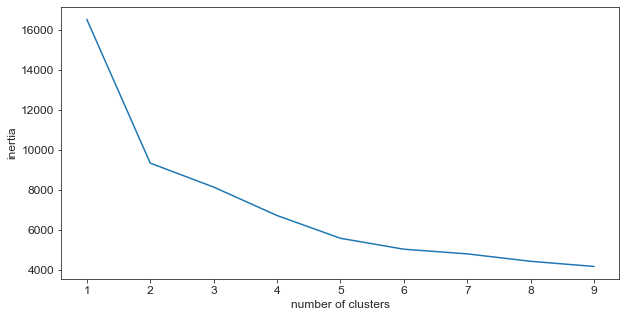

In [684]:
optimise_k_means(df_multi_nor_byrow_mean,10)

In [45]:
kmean_df = df_multi_nor_byrow_mean.copy()

kmeans=KMeans(n_clusters=4, random_state=42)
kmeans.fit(kmean_df[['con', 'dmso', 'dfo', 'torin2', 'isrib', 'a939572','mg-132']])

kmean_df['kmeans']=kmeans.labels_

In [46]:
sig_pros_R = kmean_df.iloc[:626,:].sort_values(by = 'kmeans').iloc[:,:-1]

sig_metas_R = kmean_df.iloc[626:,:].sort_values(by = 'kmeans').iloc[:,:-1]

# sig_pros_R.to_csv(f'{file_save_path}\case2_sig_dysregu_proteins_mean_kmean_clustered.csv')

# sig_metas_R.to_csv(f'{file_save_path}\case2_sig_dysregu_metas_mean_kmean_clustered.csv')

In [47]:
sig_metas_R

,con,dmso,dfo,torin2,isrib,a939572,mg-132
110.07129,0.375869,-1.057044,0.063695,0.372614,-0.448760,0.350827,0.405174
354.26392,-0.901629,-0.488451,-0.278337,1.088720,0.111680,0.222261,0.261347
356.20645,-1.043094,-0.923808,-0.464977,1.362397,0.321406,0.310110,0.464575
356.2431,-1.204183,-0.718983,-0.554932,1.591674,0.266936,0.269665,0.382113
356.27954,-1.004478,-0.246202,-0.490859,0.854270,-0.003007,0.155402,0.722356
...,...,...,...,...,...,...,...
409.06646,0.326009,-0.019454,-0.410944,-0.060494,0.516886,-0.687964,0.358088
389.87525,0.097924,0.169611,-0.334113,-0.629044,0.099271,-0.376734,0.928825
610.33964,0.510645,0.538698,-0.094896,-1.184101,-0.219475,-0.250731,0.643739
397.71377,0.030837,-0.222747,-0.317280,-0.433371,0.434632,-0.324334,0.798718


In [48]:
result = kmean_df.drop(['1/contam_sp|P02769|ALBU_BOVIN','1/contam_sp|P00761|TRYP_PIG'])
result2 = result.iloc[:,:-1]
result2


,con,dmso,dfo,torin2,isrib,a939572,mg-132
1/sp|A6NHQ2|FBLL1_HUMAN,-0.289546,-0.899204,0.115367,0.539616,0.359346,-0.233266,0.428527
1/sp|A9QM74|IMA8_HUMAN,-0.241557,-0.796163,-0.240725,0.179876,-0.302489,-0.302272,1.698191
1/sp|O00148|DX39A_HUMAN,-0.644282,-0.737128,-0.465707,1.056254,1.408108,0.285179,-0.868093
1/sp|O00154|BACH_HUMAN,-0.097942,-0.136961,0.307374,-0.312208,-0.948018,0.263273,0.890304
1/sp|O00231|PSD11_HUMAN,0.185981,0.446106,0.044947,-1.185777,-0.083808,0.220616,0.288619
...,...,...,...,...,...,...,...
1013.65083,-0.562055,0.242091,0.178750,0.826269,0.470579,-0.726159,-0.407457
979.50345,1.097998,0.721779,0.625435,-0.934682,-0.693195,0.093833,-0.897559
1009.51108,0.939474,0.649938,0.330900,-1.168219,-0.559018,0.120910,-0.333047
1001.57821,-0.300308,0.824575,0.143044,-0.990352,0.589861,-0.525548,0.151172


In [49]:
sig_cluster3=result.loc[result['kmeans']==3]
sig_cluster2=result.loc[result['kmeans']==2]
sig_cluster1=result.loc[result['kmeans']==1]
sig_cluster0=result.loc[result['kmeans']==0]

# Create a dictionary of cluster names and corresponding data
cluster_data = {'multiCluster1': result2.loc[list(sig_cluster0.index)],
                'multiCluster2': result2.loc[list(sig_cluster1.index)],
                'multiCluster3': result2.loc[list(sig_cluster2.index)],
                'multiCluster4': result2.loc[list(sig_cluster3.index)]}

In [53]:
# Using 'with ... as writer:' automatically closes the file once done.
with pd.ExcelWriter(r'F:\SMAD PROJECT\96well_casestudy2\files\multiome_clusters_case2.xlsx') as writer:
    for sheet_name, data_df in cluster_data.items():
        # Convert the data to a DataFrame
        df_all_clusters = pd.DataFrame(data_df)
        
        # Write DataFrame to the specified sheet
        # index=False to avoid writing row indices
        df_all_clusters.to_excel(writer, sheet_name=sheet_name, index=True)

In [32]:
# Function to split and format the index (multiple proteins)
def process_protein_index(input_str):
    parts = input_str.split('|')[1:]  # Split and skip the first part
    cleaned_pairs = []
    for i in range(0, len(parts), 2):
        # Clean /sp and /tr from both accession and protein name
        accession = parts[i].split('/')[0]
        protein = parts[i+1].split('/')[0]
        cleaned_pairs.append(f"{accession}|{protein}")
    return cleaned_pairs

In [33]:

def get_gene_cluster(listname = sig_cluster0.index[:153]):
    
    protein_cluster = []
    for item in listname: 
        protein_cluster.append(process_protein_index(item))
    flattened_list = [item for sublist in protein_cluster for item in sublist]
    gene_cluster = [item.split("|")[-1].split("_")[0] for item in flattened_list]
    return gene_cluster

def get_gene_cluster2(listname = sig_cluster0.index[:153]):
    
    gene_cluster = [item.split("|")[-1].split("_")[0] for item in listname]
    return gene_cluster



NameError: name 'sig_cluster0' is not defined

In [910]:
gene_cluster_data = {'geneCluster1': get_gene_cluster(listname = sig_cluster0.index[:153]),
                     'geneCluster2': get_gene_cluster(listname = sig_cluster1.index[:168]),
                     'geneCluster3': get_gene_cluster(listname = sig_cluster2.index[:152]),
                     'geneCluster4': get_gene_cluster(listname = sig_cluster3.index[:151])}

gene_cluster_data2 = {'geneCluster1': get_gene_cluster2(listname = sig_cluster0.index[:153]),
                     'geneCluster2': get_gene_cluster2(listname = sig_cluster1.index[:168]),
                     'geneCluster3': get_gene_cluster2(listname = sig_cluster2.index[:152]),
                     'geneCluster4': get_gene_cluster2(listname = sig_cluster3.index[:151])}

In [913]:
# df_gene_clusters = pd.DataFrame.from_dict(gene_cluster_data, orient='index').T
# df_gene_clusters.to_csv(f'{file_save_path}\case2_genes_pro_kmean_clustered.csv') 

In [914]:
df_gene_clusters2 = pd.DataFrame.from_dict(gene_cluster_data2, orient='index').T
df_gene_clusters2.to_csv(f'{file_save_path}\case2_genes_pro_kmean_clustered2.csv') 

In [903]:
sig_cluster3

,con,dmso,dfo,torin2,isrib,a939572,mg-132,kmeans
1/sp|A9QM74|IMA8_HUMAN,-0.241557,-0.796163,-0.240725,0.179876,-0.302489,-0.302272,1.698191,3
1/sp|O00154|BACH_HUMAN,-0.097942,-0.136961,0.307374,-0.312208,-0.948018,0.263273,0.890304,3
1/sp|O00410|IPO5_HUMAN,0.765281,-0.314928,0.196845,0.353868,-1.200728,-0.055678,0.348603,3
1/sp|O00487|PSDE_HUMAN,-0.321288,-0.158141,-0.216882,-0.778106,0.073653,0.198353,1.110795,3
1/sp|O00571|DDX3X_HUMAN,0.297525,0.384546,0.070238,-0.895545,-1.338144,-0.260456,1.692000,3
...,...,...,...,...,...,...,...,...
987.07369,0.009363,0.639195,0.113140,-1.079777,0.641258,-0.443826,0.031446,3
993.1535,-0.516691,0.737387,-0.050786,-0.837867,0.663288,0.000498,-0.108708,3
983.56239,0.433927,0.031043,-0.022018,-0.526013,0.085680,-0.826940,0.816646,3
983.8984,0.508490,0.800516,-0.314090,-0.455875,-0.120881,-0.909669,0.495893,3


[153, 2286]


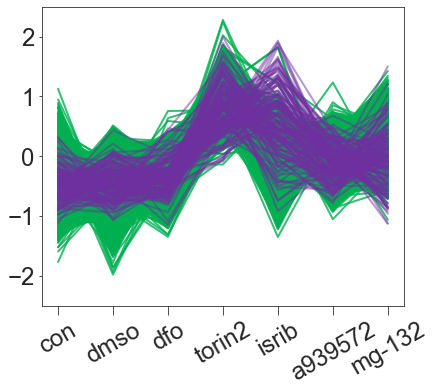

[168, 1192]


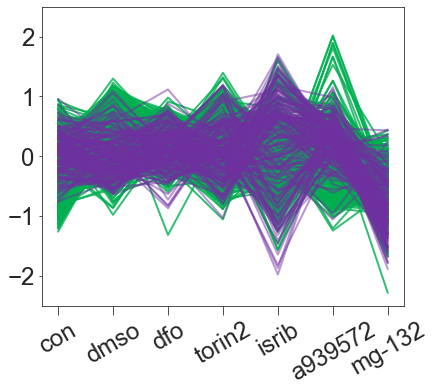

[152, 1116]


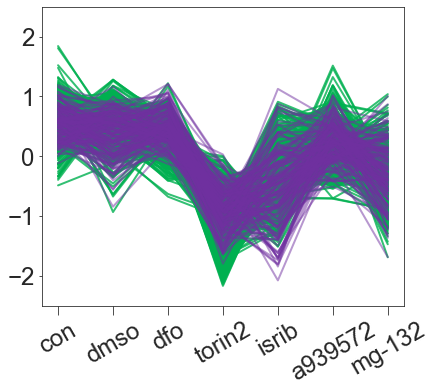

[151, 745]


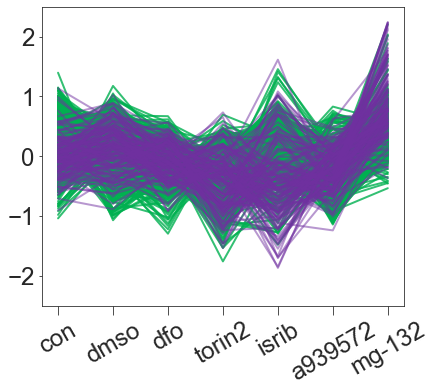

In [696]:
x = ['con', 'dmso', 'dfo', 'torin2', 'isrib', 'a939572','mg-132']

# Loop over the dictionary items to plot the data for each cluster
for title, data in cluster_data.items():
    plt.figure(figsize=(6.5, 5.5), edgecolor='#04253a')
    plt.rcParams['font.family'] = 'Arial'

    num1, num2 = [], []

    # First, plot metabolites (so they are behind)
    for index in data.index:
        if '.' in index:  # Metabolites
            plt.plot(x, list(data.loc[index]), color="#00B050", alpha=0.8, linewidth=2, label='metabolites', zorder=1) 
            num2.append(index)

    # Then, plot proteins (so they are on top)
    for index in data.index:
        if 'HUMAN' in index:  # Proteins
            plt.plot(x, list(data.loc[index]), color="#7030A0", alpha=0.5, linewidth=2, label='proteins', zorder=2)  
            num1.append(index)

    print([len(num1), len(num2)])

    plt.xticks(fontsize=24, rotation=30)
    plt.yticks(fontsize=24)
    plt.ylim(-2.5, 2.5)
    plt.yticks([-2, -1, 0, 1, 2])
    plt.tick_params(axis='x', which='both', length=9)
    plt.savefig(f'{figure_save_path}/{title}.svg',bbox_inches='tight',dpi = 1000)
    plt.show()

# plot typical metabolites or proteins

In [67]:
# Create a new DataFrame to store processed proteome dataset
dfgg = df_pro_sig.iloc[2:,:]
new_rows = []
for index, row in dfgg.iterrows():
    formatted_proteins = process_protein_index(index)
    for protein in formatted_proteins:
        new_row = row.copy()
        new_row.name = protein  # Set new index
        new_rows.append(new_row)
# Convert list of new rows into a DataFrame
processed_df = pd.DataFrame(new_rows)
# remove duplicate index
haha_df = processed_df[~processed_df.index.duplicated(keep='first')]

In [68]:
haha_df2 = standardscaler_row(haha_df)
# haha_df2.to_csv(f'{file_save_path}\case2_sig_dysregu_proteins_index_splited_scaledbyrow.csv')

In [51]:
# functions for box plot
def getdf(proname='P04406|G3P_HUMAN',df=df): 

    con   = df[[col for col in df.columns if "con" in col]].loc[proname].to_frame()
    dmso  = df[[col for col in df.columns if "dmso" in col]].loc[proname].to_frame()
    dfo   = df[[col for col in df.columns if "dfo" in col]].loc[proname].to_frame()
    tori  = df[[col for col in df.columns if "tori" in col]].loc[proname].to_frame()
    isrib = df[[col for col in df.columns if "isrib" in col]].loc[proname].to_frame()
    mg132 = df[[col for col in df.columns if "mg132" in col]].loc[proname].to_frame()
    a9395 = df[[col for col in df.columns if "a9395" in col]].loc[proname].to_frame()
    
    treatment = ['con']*len(con) + ["dmso"]* len(dmso) + ["dfo"]* len(dfo) + ["torin2"]*len(tori) + ["isrib"]* len(isrib) + ["a939572"]* len(a9395)+ ["mg-132"]* len(mg132)  
    con.columns=['Value']  
    dmso.columns=['Value']   
    dfo.columns=['Value']
    tori.columns=['Value']
    isrib.columns=['Value']
    mg132.columns=['Value']    
    a9395.columns=['Value']      
    made=pd.concat([con,dmso,dfo,tori,isrib,mg132,a9395])
    made['treatment'] = treatment
    return(made)


def get_combined_df(pro_names, df=df): 
    combined_df = pd.DataFrame()  # Initialize an empty DataFrame
    
    for name in pro_names:
            
        con   = df[[col for col in df.columns if "con" in col]].loc[proname].to_frame()
        dmso  = df[[col for col in df.columns if "dmso" in col]].loc[proname].to_frame()
        dfo   = df[[col for col in df.columns if "dfo" in col]].loc[proname].to_frame()
        tori  = df[[col for col in df.columns if "tori" in col]].loc[proname].to_frame()
        isrib = df[[col for col in df.columns if "isrib" in col]].loc[proname].to_frame()
        mg132 = df[[col for col in df.columns if "mg132" in col]].loc[proname].to_frame()
        a9395 = df[[col for col in df.columns if "a9395" in col]].loc[proname].to_frame()
        treatment = ['con']*len(con) + ["dmso"]* len(dmso) + ["dfo"]* len(dfo) + ["torin2"]*len(tori) + ["isrib"]* len(isrib) + ["a939572"]* len(a9395)+ ["mg-132"]* len(mg132)
        con.columns=['Value']  
        dmso.columns=['Value']   
        dfo.columns=['Value']
        tori.columns=['Value']
        isrib.columns=['Value']
        mg132.columns=['Value']    
        a9395.columns=['Value']      
        protein_df = pd.concat([con,dmso,dfo,tori,isrib,mg132,a9395])
        protein_df['treatment'] = treatment
        protein_df["protein"]   = name
        # Append to the combined DataFrame
        combined_df = pd.concat([combined_df, protein_df])
    return(combined_df)

def plot_select_proteins_pattern(dfdf = df, figuresize=(10, 5)): 
    plt.rcParams['font.family'] = 'Arial'
    
    # Set the same palette
    palette = sns.color_palette("viridis", len(dfdf["protein"].unique()))
    order = dfdf["treatment"].unique()
    palette2 = sns.color_palette("Set1", len(dfdf["protein"].unique()))
    # Create figure
    plt.rcParams['font.family'] = 'Arial'
    plt.figure(figsize = figuresize)
    sns.boxplot(
        x="treatment", y="Value", hue="protein", data=dfdf,
        palette=palette, dodge=True, width=0.6, showfliers=False, order=order, 
        # legend=True
    )
    
    # Plot fitted curve for each protein
    proteins = dfdf["protein"].unique()
    for i, protein in enumerate(proteins):
        # Extract data for the current protein
        protein_data = dfdf[dfdf["protein"] == protein]
        medians = [protein_data[protein_data["treatment"] == treatment]["Value"].median() for treatment in order]
        treatment_indices = np.arange(len(order))  # Numeric x-values for treatments
    
        # Create a smooth curve using spline interpolation
        spline = make_interp_spline(treatment_indices, medians, k=3)  # k=3 for cubic spline
        smooth_x = np.linspace(treatment_indices.min(), treatment_indices.max(), 300)  # Generate 300 points for smoothness
        smooth_y = spline(smooth_x)
    
        # Plot the smooth curve
        plt.plot(smooth_x, smooth_y, linestyle='dashed', color=palette2[i], linewidth=2,
                 label=f'{protein} Curve')
    
    # Add labels and ticks
    plt.xlabel(" ")
    plt.ylabel("Z-Score", fontsize=22)
    plt.xticks(np.arange(len(order)), order, fontsize=22)  # Use original treatment names as ticks
    plt.yticks(fontsize=20)
    plt.tight_layout()
    
    # Optional: Show legend for the protein curves
    plt.legend(title="", bbox_to_anchor=(1.0, 1), loc='upper left')
    
    plt.show()


def plot_fig(listname = 'A6NHQ2|FBLL1_HUMAN', dftar = df, figure = (11,3)):
    plt.rcParams['font.family'] = 'Arial'
    plt.figure(figsize= figure)
    dataset=getdf(proname=listname,df=dftar)
    #palette = ['#9B3A4D', '#E2AE79', '#497EB2','#D0DCAA', '#8CBDA7', '#68AC57','#70A0AC']
    ax = sns.boxplot(x="treatment", y="Value",width=0.7, data=dataset,palette='viridis',showfliers=False)
    ax = sns.stripplot(x="treatment", y="Value", data=dataset, color="grey",size=8)
    ax.set_xlabel("")
    ax.set_ylabel("Score", fontsize=26)
    ax.tick_params(axis='both', labelsize=30)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    save_name = listname.split("|")[-1]
    plt.savefig(f'{figure_save_path}/{save_name}.svg',bbox_inches='tight',dpi = 800)
    # plt.title(listname)
    plt.show()

def plot_clustered_heatmap_ytick(dfheatmap= df, low=-1, high=1, figure_size=(10,8), 
                                 set_row_cluster=True, set_col_cluster=True,savename = "heatmap"):
    # Define custom color map
    colors = ["#437EB8", "#8EBBE7", "#D8E2EB", "white", "#D8E2EB", "#EB6CB6", "#E72998"]
    n_bins = 10  # Number of bins in the color map
    cmap_name = "custom_diverging"
    # custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)
    custom_cmap = "PuOr"
    
    # Set font family
    plt.rcParams['font.family'] = 'Arial'
    
    # Create the heatmap with the custom color map, figure size, and hidden dendrograms
    ax = sns.clustermap(dfheatmap, annot=False, cmap=custom_cmap, cbar=True, vmin=low, vmax=high,
                        figsize=figure_size,           # Set the figure size here
                        row_cluster=set_row_cluster,   # Enable row clustering
                        col_cluster=set_col_cluster,   # Enable column clustering
                        dendrogram_ratio=(.1, .05),      # Minimize the dendrogram size
                        tree_kws={'linewidths': 1},      # Make dendrogram lines invisible
                        cbar_pos=(-0.07, 0.8, 0.03, 0.15))
    
    # Customize the color bar ticks and labels
    cbar = ax.ax_heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20) 

    # Get the original y-tick labels as text
    yticks = [tick.get_text() for tick in ax.ax_heatmap.get_yticklabels()]
    # Apply the transformation: split each label by "_" and take the first part
    new_yticks = [item.split("_")[0].split("|")[-1] for item in yticks]
    
    # Set the new y-tick labels with your desired rotation and fontsize
    ax.ax_heatmap.set_yticklabels(new_yticks, rotation=360, fontsize=22) 
    ax.ax_heatmap.set_xticklabels(ax.ax_heatmap.get_xticklabels(), rotation=90, fontsize=24)  # Customize x-tick labels

    # Customize tick parameters (e.g., remove x tick marks)
    ax.ax_heatmap.tick_params(axis='x', which='both', length=0)
    plt.savefig(f'{figure_save_path}/{savename}.svg', dpi=800, bbox_inches='tight')
    plt.show()

In [21]:
# getdf(proname='P04406|G3P_HUMAN',df=haha_df2)

In [ ]:
get_combined_df(pro_names, df=haha_df2)

In [582]:


haha_df2[haha_df2.index.to_series().apply(lambda x: any(sub in x for sub in [ "HCDH" ]))].index

Index(['Q16836|HCDH_HUMAN'], dtype='object')

C:\Users\jymbc\AppData\Local\Temp\ipykernel_49720\1673754025.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.9, data=dataset,palette='viridis',showfliers=False)
C:\Users\jymbc\AppData\Local\Temp\ipykernel_49720\1673754025.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


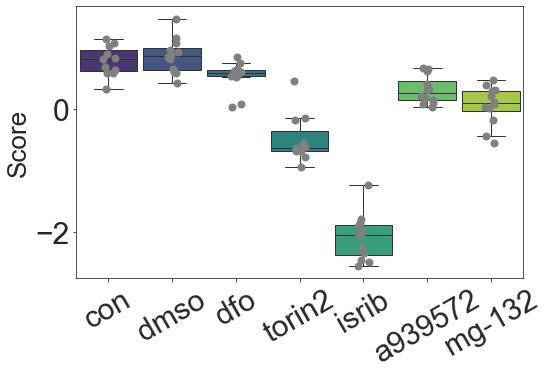

In [958]:
plot_fig(listname = 'P49327|FAS_HUMAN', dftar = haha_df2, figure = (8,5))

C:\Users\jymbc\AppData\Local\Temp\ipykernel_49720\1673754025.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.9, data=dataset,palette='viridis',showfliers=False)
C:\Users\jymbc\AppData\Local\Temp\ipykernel_49720\1673754025.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


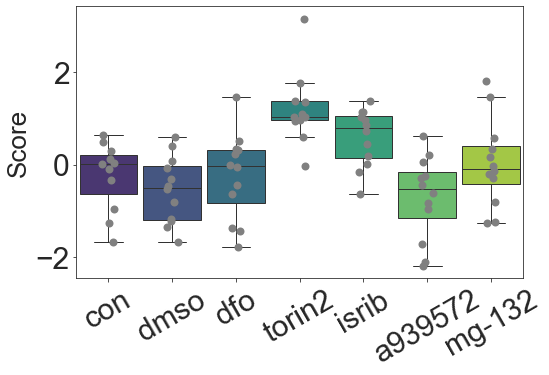

In [959]:
plot_fig(listname = 'Q16836|HCDH_HUMAN', dftar = haha_df2, figure = (8,5))

In [22]:


filtered_read_meta_withnames = read_meta_withnames2[~read_meta_withnames2.index.duplicated(keep='last')]
filtered_read_meta_withnames

,con_1,con_2,con_3,con_4,con_5,con_6,con_8,con_9,con_10,con_11,...,mg132_3,mg132_4,mg132_5,mg132_6,mg132_7,mg132_8,mg132_9,mg132_10,mg132_11,mg132_12
Indoline,0.731489,0.173725,0.675950,1.039918,0.101758,-0.038383,-2.057057,-1.335075,-1.564713,-1.140761,...,-0.041435,-0.598462,-1.280167,1.509758,-1.201307,1.938691,0.244001,1.632296,0.189038,1.476092
Choline,1.044539,-0.299869,-0.706872,0.564009,0.408475,0.591576,0.381862,-0.337824,0.567225,-0.363442,...,-0.549979,0.315417,-0.050108,0.502274,1.016010,1.772985,-0.119539,0.272816,0.101020,-0.884689
BETAINE,0.772336,0.080728,-0.545649,0.529809,0.791145,-0.018729,0.179559,-0.340063,0.156951,-0.175876,...,-0.174724,0.207807,-0.351004,0.155066,0.445268,0.910059,-0.203544,0.020510,-0.670832,-0.327096
CREATINE,1.104222,-0.049193,0.286925,2.085377,0.933357,-0.080913,-0.812063,-0.102186,0.184642,0.684530,...,-0.555897,-2.370879,-0.947207,0.692483,-0.902643,-0.791508,-0.016650,-0.052032,-0.509218,-0.907039
Tryptophan,0.703298,-0.810361,-0.108820,1.373556,1.271860,0.976365,0.094557,-0.130610,-0.297522,-0.597039,...,0.890610,-0.621138,-0.986396,-0.256682,-0.467883,-0.179683,-0.539151,0.831843,-0.725644,-0.235960
pyridoxine,0.094742,-1.313558,-1.092314,-0.375127,-0.399867,-1.323284,-1.160301,-1.684682,-2.022662,-1.968368,...,1.292971,-0.224552,-0.040673,0.898451,0.193521,0.195550,-0.065655,0.810115,-0.193456,1.271023
Phenylalanine,-1.267469,-2.397769,-1.909781,-0.033796,-1.757987,-1.020062,-0.881979,-1.361302,-2.942231,-1.474655,...,1.391519,-0.089298,0.124597,0.539288,0.419325,-1.022241,0.205600,0.674605,-0.136710,1.237564
Arginine,1.706052,0.341044,0.045288,1.696634,1.128914,1.631238,0.281837,-0.025046,-0.593304,0.177893,...,0.010946,-0.155249,-0.254852,-0.028087,-0.250820,0.374212,-0.536813,1.259973,-1.290410,-0.962381
ARGININE,1.604079,0.616056,0.177000,1.819370,1.358165,1.796165,0.313475,0.355686,0.240053,1.050276,...,-0.301150,-0.191158,-0.272362,0.068364,-0.445784,0.358344,-0.709441,1.223611,-1.161365,-1.066285
Tyrosine,0.084473,-1.287369,-0.924980,-0.376903,-0.593868,-1.230557,-1.136887,-1.785295,-2.437266,-1.962951,...,1.781926,0.142591,-0.061459,1.253129,0.396882,-0.315362,0.115953,1.113660,-0.088356,1.452449


In [34]:
# CARNITINE
# Acetylcarnitine


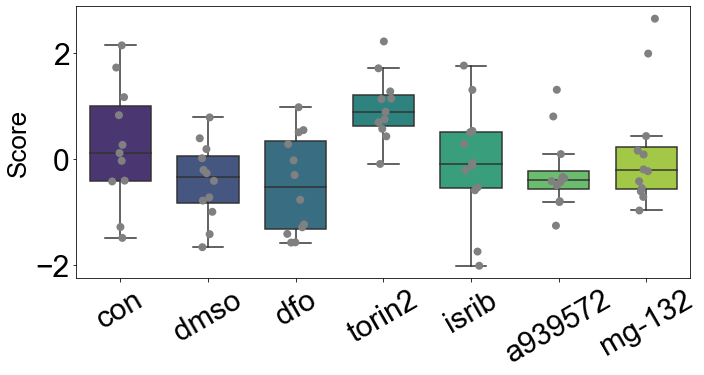

In [53]:
plot_fig(listname = 'Acetylcarnitine', dftar = filtered_read_meta_withnames, figure = (11,5))

C:\Users\jymbc\AppData\Local\Temp\ipykernel_49720\1673754025.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.9, data=dataset,palette='viridis',showfliers=False)
C:\Users\jymbc\AppData\Local\Temp\ipykernel_49720\1673754025.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


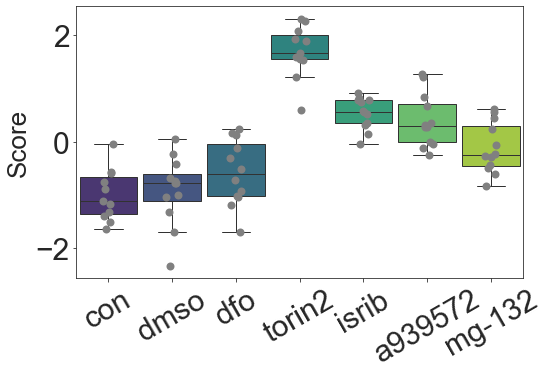

In [960]:
plot_fig(listname = 'Hexanoyl-L-Carnitine', dftar = filtered_read_meta_withnames, figure = (8,5))

C:\Users\jymbc\AppData\Local\Temp\ipykernel_49720\1673754025.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x="treatment", y="Value",width=0.9, data=dataset,palette='viridis',showfliers=False)
C:\Users\jymbc\AppData\Local\Temp\ipykernel_49720\1673754025.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


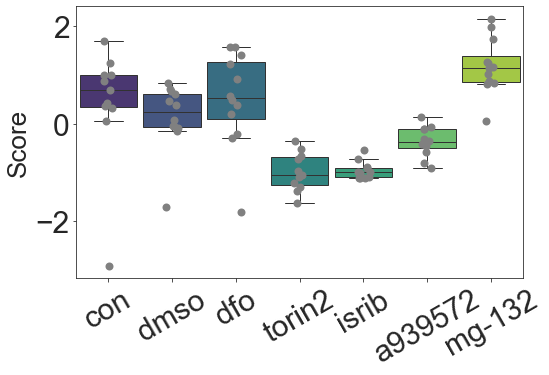

In [961]:
plot_fig(listname = '1-Stearoyl-2-hydroxy-sn-glycero-3-phosphocholine', dftar = filtered_read_meta_withnames, figure = (8,5))

# format identified multiomic dataset 

In [41]:
read_meta_withnames3 = read_meta_withnames2[~read_meta_withnames2.index.duplicated(keep='last')]
# read_meta_withnames3

In [42]:
[item for item in read_meta_withnames3.index if 'ARNITINE' in item]

['DEOXYCARNITINE', 'CARNITINE', 'PROPIONYLCARNITINE', 'O-ACETYLCARNITINE']

In [44]:
pro_sig_splited_nor = pd.read_csv(f'{file_save_path}\case2_sig_dysregu_proteins_index_splited_scaledbyrow.csv',index_col=0)

In [47]:
pro_sig_splited_nor.columns

Index(['con_1', 'con_2', 'con_3', 'con_4', 'con_5', 'con_6', 'con_8', 'con_9',
       'con_10', 'con_11', 'con_12', 'dmso_1', 'dmso_2', 'dmso_3', 'dmso_4',
       'dmso_5', 'dmso_6', 'dmso_7', 'dmso_8', 'dmso_9', 'dmso_10', 'dmso_11',
       'dmso_12', 'dfo_1', 'dfo_2', 'dfo_3', 'dfo_4', 'dfo_5', 'dfo_6',
       'dfo_7', 'dfo_8', 'dfo_9', 'dfo_10', 'dfo_11', 'dfo_12', 'tori_1',
       'tori_2', 'tori_3', 'tori_4', 'tori_5', 'tori_6', 'tori_7', 'tori_9',
       'tori_10', 'tori_11', 'tori_12', 'isrib_1', 'isrib_2', 'isrib_3',
       'isrib_4', 'isrib_5', 'isrib_6', 'isrib_7', 'isrib_8', 'isrib_9',
       'isrib_10', 'isrib_11', 'isrib_12', 'mg132_1', 'mg132_2', 'mg132_3',
       'mg132_4', 'mg132_5', 'mg132_6', 'mg132_7', 'mg132_8', 'mg132_9',
       'mg132_10', 'mg132_11', 'mg132_12', 'a9395_1', 'a9395_2', 'a9395_3',
       'a9395_4', 'a9395_5', 'a9395_6', 'a9395_7', 'a9395_8', 'a9395_9',
       'a9395_10', 'a9395_11', 'a9395_12'],
      dtype='object')

In [46]:
# read_meta_withnames3.index

In [814]:
# kimi = pd.concat([haha_df2.drop_duplicates(subset=['con_1'], keep='first'),read_meta_withnames3])
# kimi.to_csv((f'{file_save_path}\case2_sig_dysregu_multi_index_splited_scaledbyrow.csv'))

In [815]:
# haha_df2.drop_duplicates(subset=['con_1'], keep='first')

In [922]:
get_mean_dataset(df = read_meta_withnames2)

,con,dmso,dfo,torin2,isrib,a939572,mg-132
Indoline,-0.200788,-0.424683,-0.769417,0.771413,0.495082,-0.325471,0.501416
CREATINE,0.398282,-1.863284,-0.463748,1.199991,-0.193704,0.479670,0.575983
Choline,0.267995,-1.783962,0.638280,0.916515,-0.626569,0.432972,0.253479
BETAINE,0.189757,-1.687483,-0.422079,1.614216,0.086619,0.353534,0.015768
CREATINE,0.354761,-0.654624,-0.291290,1.102953,0.275189,-0.027777,-0.637736
...,...,...,...,...,...,...,...
1-Stearoyl-2-hydroxy-sn-glycero-3-phosphocholine,0.432596,0.140088,0.501064,-0.987996,-0.959201,1.189888,-0.362722
Lyso-PAF C-18 from NIST14,0.091531,0.310447,0.953828,-1.054604,-0.964381,0.835116,-0.252194
1-(9Z-Octadecenoyl)-sn-glycero-3-phosphocholine,0.214066,0.152463,0.845558,-0.185582,-0.603142,0.440057,-0.861046
Lyso-PAF C-18 from NIST14,-0.560283,0.554041,0.658687,-0.056976,-0.168638,0.027960,-0.506228


In [817]:
read_meta_withnames3

,con_1,con_2,con_3,con_4,con_5,con_6,con_8,con_9,con_10,con_11,...,mg132_3,mg132_4,mg132_5,mg132_6,mg132_7,mg132_8,mg132_9,mg132_10,mg132_11,mg132_12
Indoline,0.731489,0.173725,0.675950,1.039918,0.101758,-0.038383,-2.057057,-1.335075,-1.564713,-1.140761,...,-0.041435,-0.598462,-1.280167,1.509758,-1.201307,1.938691,0.244001,1.632296,0.189038,1.476092
CREATINE,1.195156,0.361143,-0.131790,0.571020,0.983398,0.336870,0.307937,-0.287026,-0.100703,-0.086850,...,0.337126,0.924010,0.168685,0.801435,1.010802,1.290005,0.273254,0.699008,0.231745,0.254973
Choline,1.044539,-0.299869,-0.706872,0.564009,0.408475,0.591576,0.381862,-0.337824,0.567225,-0.363442,...,-0.549979,0.315417,-0.050108,0.502274,1.016010,1.772985,-0.119539,0.272816,0.101020,-0.884689
BETAINE,0.772336,0.080728,-0.545649,0.529809,0.791145,-0.018729,0.179559,-0.340063,0.156951,-0.175876,...,-0.174724,0.207807,-0.351004,0.155066,0.445268,0.910059,-0.203544,0.020510,-0.670832,-0.327096
Tryptophan,0.703298,-0.810361,-0.108820,1.373556,1.271860,0.976365,0.094557,-0.130610,-0.297522,-0.597039,...,0.890610,-0.621138,-0.986396,-0.256682,-0.467883,-0.179683,-0.539151,0.831843,-0.725644,-0.235960
pyridoxine,0.094742,-1.313558,-1.092314,-0.375127,-0.399867,-1.323284,-1.160301,-1.684682,-2.022662,-1.968368,...,1.292971,-0.224552,-0.040673,0.898451,0.193521,0.195550,-0.065655,0.810115,-0.193456,1.271023
Phenylalanine,-1.267469,-2.397769,-1.909781,-0.033796,-1.757987,-1.020062,-0.881979,-1.361302,-2.942231,-1.474655,...,1.391519,-0.089298,0.124597,0.539288,0.419325,-1.022241,0.205600,0.674605,-0.136710,1.237564
Arginine,1.706052,0.341044,0.045288,1.696634,1.128914,1.631238,0.281837,-0.025046,-0.593304,0.177893,...,0.010946,-0.155249,-0.254852,-0.028087,-0.250820,0.374212,-0.536813,1.259973,-1.290410,-0.962381
ARGININE,1.604079,0.616056,0.177000,1.819370,1.358165,1.796165,0.313475,0.355686,0.240053,1.050276,...,-0.301150,-0.191158,-0.272362,0.068364,-0.445784,0.358344,-0.709441,1.223611,-1.161365,-1.066285
Tyrosine,0.084473,-1.287369,-0.924980,-0.376903,-0.593868,-1.230557,-1.136887,-1.785295,-2.437266,-1.962951,...,1.781926,0.142591,-0.061459,1.253129,0.396882,-0.315362,0.115953,1.113660,-0.088356,1.452449


# 10 clusters of proteins 

In [53]:
# >>> group1: glycolysis/gluconeogenesis-related proteins


pro_function_group1  = [
                        # 'P07195|LDHB_HUMAN',get_mean_dataset
                        'P00338|LDHA_HUMAN', 'P00558|PGK1_HUMAN', 'P04075|ALDOA_HUMAN',
                       'P04406|G3P_HUMAN', 
    # 'P06733|ENOA_HUMAN', 
                       'P06744|G6PI_HUMAN',
                       'P14618|KPYM_HUMAN', 
    # 'P17858|PFKAL_HUMAN', 
                        'P18669|PGAM1_HUMAN',
                       'P19367|HXK1_HUMAN', 'P60174|TPIS_HUMAN']  





In [62]:
haha_df2_mean = get_mean_dataset(df = haha_df2)

In [64]:
haha_df2_mean.to_csv(f'{file_save_path}\case2_sig_dysregu_proteins_index_splited_scaledbyrow_mean.csv')

In [45]:
def get_selected_proteins(listgroup = pro_function_group1, raw_df = haha_df2_mean):
        
    # Create a regex pattern to match any of the substrings
    pattern = '|'.join(listgroup)    
    # Locate rows where index contains any of the substrings
    selected_df = raw_df[raw_df.index.str.contains(pattern, case=False, na=False)]
    return selected_df

In [46]:
get_combined_df(pro_names = pro_function_group1 , df=haha_df2)

NameError: name 'proname' is not defined

In [54]:
get_selected_proteins(listgroup = pro_function_group1, raw_df = haha_df2_mean)

,con,dmso,dfo,torin2,isrib,a939572,mg-132
P00338|LDHA_HUMAN,1.153641,0.745175,1.067607,-0.725804,-1.154796,-0.359208,-0.690963
P00558|PGK1_HUMAN,1.191125,0.859382,0.710877,-0.599293,-0.649814,-0.505575,-0.957382
P04075|ALDOA_HUMAN,1.009489,0.863371,1.049408,-0.880500,-1.597513,-0.266587,-0.166920
P04406|G3P_HUMAN,0.810083,0.933923,1.001673,-0.196778,-1.191210,-0.009052,-1.297530
P06744|G6PI_HUMAN,0.860966,-0.019884,1.210053,-0.146551,-0.616957,-0.199746,-1.028346
P14618|KPYM_HUMAN,0.800319,0.685607,1.207022,-0.180698,-1.237239,-0.234409,-0.988967
P18669|PGAM1_HUMAN,0.668107,0.887558,0.377499,-0.202771,-0.779207,-0.728300,-0.184108
P19367|HXK1_HUMAN,0.815438,0.275419,0.398899,-0.855870,-0.710638,0.237948,-0.164566
P60174|TPIS_HUMAN,1.074439,0.360801,0.767536,-0.392568,0.036201,-0.103126,-1.686460


In [47]:
# get_selected_proteins(listgroup = pro_function_group1 , raw_df = haha_df2_mean)

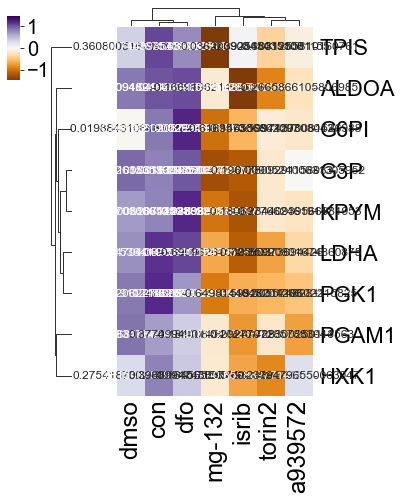

In [58]:
plot_clustered_heatmap_ytick(dfheatmap= get_selected_proteins(listgroup = pro_function_group1, raw_df = haha_df2_mean), 
                             low=-1.5, high=1.5, figure_size=(6,6), 
                            set_row_cluster=True, set_col_cluster=True,savename = "glycolysis")

In [84]:
testlist = ["TBB"]
haha_df2[haha_df2.index.to_series().apply(lambda x: any(sub in x for sub in testlist))].index

Index(['P07437|TBB5_HUMAN', 'P68371|TBB4B_HUMAN', 'Q9BUF5|TBB6_HUMAN',
       'Q13885|TBB2A_HUMAN', 'Q9BVA1|TBB2B_HUMAN'],
      dtype='object')

In [712]:
tca_related = [item.split("|")[-1].split("_")[0] for item in pro_function_group3]

In [807]:
pro_function_group6 = ['P09619|PGFRB_HUMAN', 'P10721|KIT_HUMAN', 'P16234|PGFRA_HUMAN',
       'P17948|VGFR1_HUMAN', 'P27361|MK03_HUMAN', 'P28482|MK01_HUMAN',
       'P35916|VGFR3_HUMAN', 'P35968|VGFR2_HUMAN', 'P36888|FLT3_HUMAN',
       'Q9UBE8|NLK_HUMAN','P45880|VDAC2_HUMAN']

In [808]:
get_selected_proteins(listgroup = pro_function_group6, raw_df = haha_df2_mean)

,con,dmso,dfo,torin2,isrib,a939572,mg-132
P45880|VDAC2_HUMAN,0.786344,-0.404086,0.261186,-0.725533,-0.145717,0.451738,-0.218866
P09619|PGFRB_HUMAN,0.521328,-0.207121,0.448098,-0.990508,0.045419,0.186585,-0.042899
P10721|KIT_HUMAN,0.521328,-0.207121,0.448098,-0.990508,0.045419,0.186585,-0.042899
P16234|PGFRA_HUMAN,0.521328,-0.207121,0.448098,-0.990508,0.045419,0.186585,-0.042899
P17948|VGFR1_HUMAN,0.521328,-0.207121,0.448098,-0.990508,0.045419,0.186585,-0.042899
P27361|MK03_HUMAN,0.521328,-0.207121,0.448098,-0.990508,0.045419,0.186585,-0.042899
P28482|MK01_HUMAN,0.521328,-0.207121,0.448098,-0.990508,0.045419,0.186585,-0.042899
P35916|VGFR3_HUMAN,0.521328,-0.207121,0.448098,-0.990508,0.045419,0.186585,-0.042899
P35968|VGFR2_HUMAN,0.521328,-0.207121,0.448098,-0.990508,0.045419,0.186585,-0.042899
P36888|FLT3_HUMAN,0.521328,-0.207121,0.448098,-0.990508,0.045419,0.186585,-0.042899


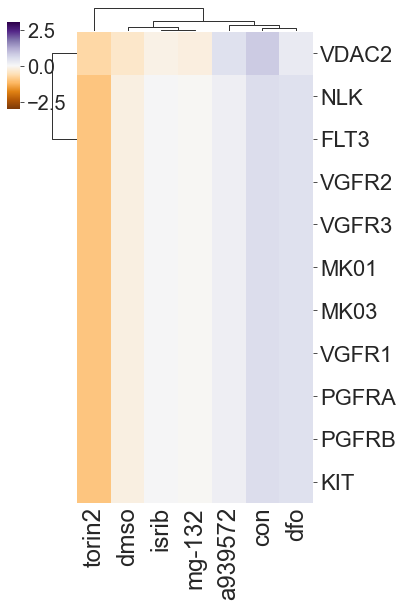

In [809]:
plot_clustered_heatmap_ytick(dfheatmap= get_selected_proteins(listgroup = pro_function_group6, raw_df = haha_df2_mean), 
                             low=-3, high=3, figure_size=(6,8), 
                            set_row_cluster=True, set_col_cluster=True,savename = "haah")

In [771]:

pro_function_group2  = [
                        # --- TCA Cycle/ OXPHOS ---
        # TCA循环 + 线粒体呼吸链 (复合体I~V)
        "O43837|IDH3B_HUMAN",  # 异柠檬酸脱氢酶3B
        "P50213|IDH3A_HUMAN",
        "P08559|ODPA_HUMAN",   # 丙酮酸脱氢酶 E1 α亚基
        "P10515|ODP2_HUMAN",   # 丙酮酸脱氢酶 E2
        "P11177|ODPB_HUMAN",   # 丙酮酸脱氢酶 E1 β亚基
        "P40925|MDHC_HUMAN",   # 苹果酸脱氢酶(线粒体/细胞质 isoform)
        "P40926|MDHM_HUMAN",
        "P31040|SDHA_HUMAN",   # 琥珀酸脱氢酶(复合体II)
        "P07919|QCR6_HUMAN",   # 复合体III亚基6
        "P31930|QCR1_HUMAN",
        "P00403|COX2_HUMAN",   # 复合体IV (细胞色素 c 氧化酶)亚基
        "P10606|COX5B_HUMAN",
        "P20674|COX5A_HUMAN",
        "P28331|NDUS1_HUMAN",  # 复合体I亚基
        "O75306|NDUS2_HUMAN",
        "O75489|NDUS3_HUMAN",
        "P06576|ATPB_HUMAN",   # 复合体V (ATP合酶)beta亚基
        "P25705|ATPA_HUMAN",
        "P36542|ATPG_HUMAN",
        "P56385|ATP5I_HUMAN",
        "P56381|ATP5E_HUMAN",
        "Q5VTU8|AT5EL_HUMAN",  
        "O75390|CISY_HUMAN"    # 柠檬酸合酶
                    ]

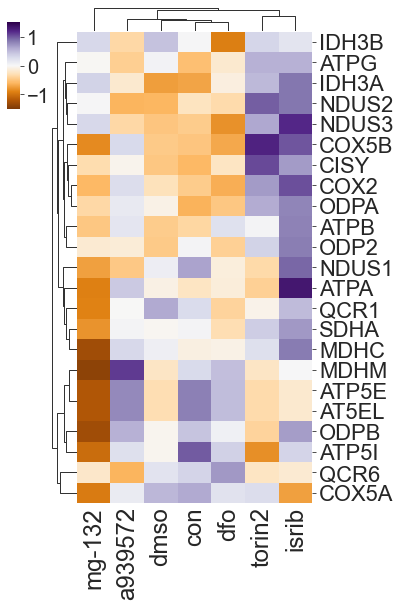

In [772]:
plot_clustered_heatmap_ytick(dfheatmap= get_selected_proteins(listgroup = pro_function_group2, raw_df = haha_df2_mean), 
                             low=-1.5, high=1.5, figure_size=(6,8), 
                            set_row_cluster=True, set_col_cluster=True,savename = "TCA Cycle_OXPHOS")

In [798]:
#  >>> group3: Lipid/cholesterol/fatty acid metabolism

pro_function_group3  = ['O60664|PLIN3_HUMAN', 'P13804|ETFA_HUMAN', 'P30084|ECHM_HUMAN',
                        'P30086|PEBP1_HUMAN', 'P38117|ETFB_HUMAN', 'P40939|ECHA_HUMAN',
                        'P55084|ECHB_HUMAN', 'Q01469|FABP5_HUMAN', 'Q16698|DECR_HUMAN',
                        'Q16836|HCDH_HUMAN',' P49327|FAS_HUMAN']

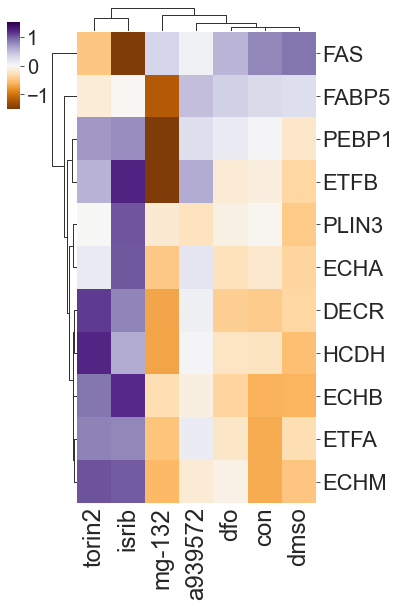

In [799]:
plot_clustered_heatmap_ytick(dfheatmap= get_selected_proteins(listgroup = pro_function_group3, raw_df = haha_df2_mean), 
                             low=-1.5, high=1.5, figure_size=(6,8), 
                            set_row_cluster=True, set_col_cluster=True,savename = "Lipid_cholesterol_fatty acid metabolism")

In [793]:
#  >>> group4: Ribosomal related proteins 

pro_function_group4  =    [ "P08621|RU17_HUMAN",
                            "P09661|RU2A_HUMAN",
                            "P15880|RS2_HUMAN",
                            "P18077|RL35A_HUMAN",
                            "P23396|RS3_HUMAN",
                            "P25398|RS12_HUMAN",
                            "P26373|RL13_HUMAN",
                            "P30050|RL12_HUMAN",
                            "P35268|RL22_HUMAN",
                            "P36578|RL4_HUMAN",
                            "P39023|RL3_HUMAN",
                            "P40429|RL13A_HUMAN",
                            "P42677|RS27_HUMAN",
                            "Q71UM5|RS27L_HUMAN",
                            "P46776|RL27A_HUMAN",
                            "P46777|RL5_HUMAN",
                            "P46781|RS9_HUMAN",
                            "P46782|RS5_HUMAN",
                            "P49207|RL34_HUMAN",
                            "P50914|RL14_HUMAN",
                            "P61247|RS3A_HUMAN",
                            "P61313|RL15_HUMAN",
                            "P61353|RL27_HUMAN",
                            "P62081|RS7_HUMAN",
                            "P62241|RS8_HUMAN",
                            "P62244|RS15A_HUMAN",
                            "P62249|RS16_HUMAN",
                            "P62263|RS14_HUMAN",
                            "P62269|RS18_HUMAN",
                            "P62277|RS13_HUMAN",
                            "P62280|RS11_HUMAN",
                            "P62424|RL7A_HUMAN",
                            "P62701|RS4X_HUMAN",
                            "P62750|RL23A_HUMAN",
                            "P62753|RS6_HUMAN",
                            "P62829|RL23_HUMAN",
                            "P62851|RS25_HUMAN",
                            "P62857|RS28_HUMAN",
                            "P62861|RS30_HUMAN",
                            "P62899|RL31_HUMAN",
                            "P62906|RL10A_HUMAN",
                            "P62913|RL11_HUMAN",
                            "P62917|RL8_HUMAN",
                            "P62979|RS27A_HUMAN",
                            "P63220|RS21_HUMAN",
                            "P05388|RLA0_HUMAN",
                            "Q8NHW5|RLA0L_HUMAN",
                            "Q02543|RL18A_HUMAN",
                            "Q07020|RL18_HUMAN",
                            "P83731|RL24_HUMAN",
                            "P84098|RL19_HUMAN",
                            "Q9Y3U8|RL36_HUMAN",]

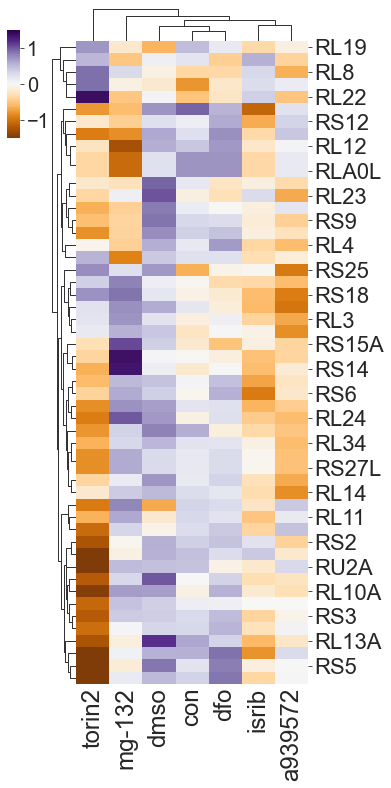

In [1085]:
plot_clustered_heatmap_ytick(dfheatmap= get_selected_proteins(listgroup = pro_function_group4, raw_df = haha_df2_mean), 
                             low=-1.5, high=1.5, figure_size=(6,10), 
                            set_row_cluster=True, set_col_cluster=True,savename = "Ribosomal related proteins")

In [791]:
#  >>> group5: Ubiquitin-proteasome / Protein hydrolysis / Autophagy-lysosomal degradation system related proteins 
pro_function_group5  =         [
                                # 蛋白酶体亚基 (Proteasome Subunits)
                                "O00487|PSDE_HUMAN",
                                "O14818|PSA7_HUMAN",
                                "P20618|PSB1_HUMAN",
                                "P25788|PSA3_HUMAN",
                                "P25789|PSA4_HUMAN",
                                "P28072|PSB6_HUMAN",
                                "P28074|PSB5_HUMAN",
                                "P60900|PSA6_HUMAN",
                                
                                # 泛素与泛素样系统 (E1/E2/E3/DUB) 等
                                # E1
                                "P22314|UBA1_HUMAN",
                                # E2
                                "P61077|UB2D3_HUMAN",
                                "P62837|UB2D2_HUMAN",
                                "P61081|UBC12_HUMAN",
                                "P61088|UBE2N_HUMAN",
                                # E3
                                "Q13619|CUL4A_HUMAN",
                                "Q13620|CUL4B_HUMAN",
                                "Q15369|ELOC_HUMAN",
                                "Q13263|TIF1B_HUMAN",
                                # 去泛素化酶 (DUB)  
                                "P09936|UCHL1_HUMAN",
                                "Q93009|UBP7_HUMAN",
                                "Q96FW1|OTUB1_HUMAN",
                                    
                                 # NEDD8 / SUMO / 及其E1   
                                "Q15843|NEDD8_HUMAN",
                                "P55854|SUMO3_HUMAN",
                                "P61956|SUMO2_HUMAN",
                                "Q6EEV6|SUMO4_HUMAN",
                                "Q9UBT2|SAE2_HUMAN",
                                "Q9BT78|CSN4_HUMAN",
                                "Q13501|SQSTM_HUMAN",
                                "P07339|CATD_HUMAN",
                                "Q8WUM4|PDC6I_HUMAN",]

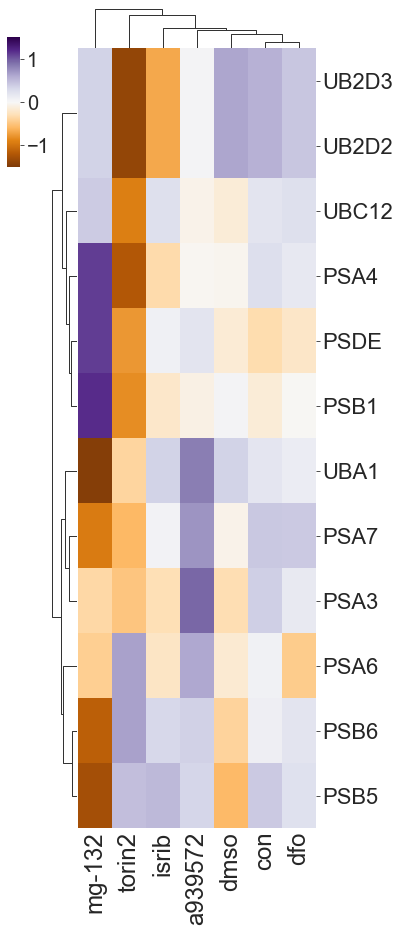

In [1084]:
plot_clustered_heatmap_ytick(dfheatmap= get_selected_proteins(listgroup = pro_function_group5[:12], raw_df = haha_df2_mean), 
                             low=-1.5, high=1.5, figure_size=(6,12), 
                            set_row_cluster=True, set_col_cluster=True,savename = "Ubiquitin-proteasome_Protein hydrolysis_Autophagy-lysosomal degradation system related proteins")

# UMAP analysis 

In [60]:
umap_df = df_multi_sig

In [61]:
treatment_umap=['Con']*11+['Dmso']*12+['Dfo']*12+['Torin2']*11+['Isrib']*12+['A939572']*12+['MG-132']*12

In [59]:
# UMAP analysis 

# Importing necessary libraries
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Separating the features and labels
X = umap_df.T

# Creating a UMAP object and fitting it to the data
reducer = umap.UMAP(random_state=300)
embedding = reducer.fit_transform(X)

# Creating a scatter plot of the reduced data
dfdf_reduced = pd.DataFrame(embedding, columns=['PC1', 'PC2'])
dfdf_reduced['target'] = treatment_umap

# Creating a scatter plot of the reduced data
import seaborn as sns
plt.figure(figsize=(8, 6.5), edgecolor='#04253a')
sns.scatterplot(x='PC1', y='PC2', hue='target', data=dfdf_reduced, markers='o', s=300, alpha=0.9)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.yticks([5, 6, 7, 8, 9,10])
plt.xticks([4, 5, 6, 7, 8,9])
#plt.yticks([])
#plt.xticks([])
plt.xlabel('X-axis', labelpad=6)
plt.ylabel('Y-axis', labelpad=6)

plt.xlabel('UMAP 1', fontsize=24)
plt.ylabel('UMAP 2', fontsize=24)

plt.legend(bbox_to_anchor=(1.01, 1.01), loc='upper left', borderaxespad=0.2,fontsize=22,handlelength=0.3)



plt.show()





AttributeError: module 'umap' has no attribute 'UMAP'

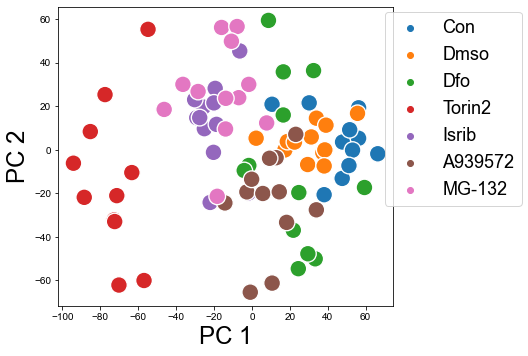

In [65]:
# df = df_multi_sig.T
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(umap_df.T)   
# perform PCA with 2 principal components
pca = PCA(n_components=2)
pca.fit(X_scaled) 
# transform the features to the new space
X_pca = pca.transform(X_scaled)   
# create a new dataframe with the principal components and target variable
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = treatment_umap
matplotlib.rcParams['font.family'] = "Arial"
plt.figure(figsize=(6, 5.5), edgecolor='#04253a')
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca, s=280)
# plt.yticks([-20, -10, 0, 10, 20],fontsize=24)
# plt.xticks([-20, -10, 0, 10, 20],fontsize=24)
# plt.yticks([-8, -4, 0, 4, 8],fontsize=24)   # for metabolome 
# plt.xticks([-10, -5, 0, 5, 10],fontsize=24) # for metabolome 
plt.xlabel('PC 1', fontsize=24)
plt.ylabel('PC 2', fontsize=24)
plt.legend(bbox_to_anchor=(1.18, 0.99), loc='upper center', ncol=1, borderaxespad=0.1,fontsize=18)
# plt.savefig(f'{figure_save_path}/{save_name}.svg',bbox_inches='tight')
plt.show()

In [ ]:
plt.savefig(r'D:\\project7_SMAD\\figure4_96well_multiomic_analysis\\UMAP.svg',bbox_inches='tight')

# correlation analysis

In [982]:
# dysregulation correlation analysis 



pro_df_vscon = get_mean_dataset(df = df4).subtract(get_mean_dataset(df = df_pro_sig)['con'], axis=0).drop(columns=['con'])
meta_df_vscon = get_mean_dataset(df = df_meta3).subtract(get_mean_dataset(df = df_meta_sig)['con'], axis=0).drop(columns=['con'])


meta_corr_df_vscon = meta_df_vscon.corr(method='spearman')
pro_corr_df_vscon = pro_df_vscon.corr(method='spearman')


In [ ]:
identified_multi_case2_sig

In [1002]:
# identified_multi_case2_sig = pd.concat([df_pro_sig,read_meta_withnames])

identified_multi_case2_sig = get_mean_dataset(pd.concat([df_pro_sig,df_meta_sig]))
identified_multi_case2_sig.index = identified_multi_case2_sig.index.astype(str)
multi_df_vscon = identified_multi_case2_sig.subtract(identified_multi_case2_sig['con'], axis=0).drop(columns=['con'])
multi_corr_df_vscon = multi_df_vscon.corr(method='spearman')

In [1003]:

# multi_corr = get_mean_dataset(df =standardscaler_row(df = identified_multi_case2_sig)).corr(method='pearson')

# multi_corr_spearman = get_mean_dataset(df =standardscaler_row(df = identified_multi_case2_sig)).corr(method='spearman')

In [1026]:
meta_corr_df_vscon

,dmso,dfo,torin2,isrib,a939572,mg-132
dmso,1.000000,0.759415,0.315330,0.605685,0.422602,0.386438
dfo,0.759415,1.000000,0.527429,0.653021,0.691646,0.427118
torin2,0.315330,0.527429,1.000000,0.697890,0.747624,0.716751
isrib,0.605685,0.653021,0.697890,1.000000,0.571723,0.781780
a939572,0.422602,0.691646,0.747624,0.571723,1.000000,0.486097
mg-132,0.386438,0.427118,0.716751,0.781780,0.486097,1.000000


In [1027]:
pro_corr_df_vscon

,dmso,dfo,torin2,isrib,a939572,mg-132
dmso,1.000000,0.374964,0.273295,0.147462,0.213739,0.464047
dfo,0.374964,1.000000,0.310744,0.331464,0.545613,0.296837
torin2,0.273295,0.310744,1.000000,0.687172,0.548138,0.440872
isrib,0.147462,0.331464,0.687172,1.000000,0.636455,0.227807
a939572,0.213739,0.545613,0.548138,0.636455,1.000000,0.204080
mg-132,0.464047,0.296837,0.440872,0.227807,0.204080,1.000000


In [1028]:
# Extract unique pairs (excluding diagonal and symmetric duplicates)
def get_unique_from_square_df(df = pro_corr_df_vscon):

    pairs = []
    for i in range(len(df.index)):
        for j in range(i + 1, len(df.columns)):  # Only consider upper triangle to remove duplicates
            pairs.append((df.index[i], df.columns[j], df.iloc[i, j]))
    
    # Convert to DataFrame
    df_pairs = pd.DataFrame(pairs, columns=['Row', 'Column', 'Value'])
    return df_pairs


In [1081]:
meta_corr_unique = get_unique_from_square_df(df=meta_corr_df_vscon)
pro_corr_unique = get_unique_from_square_df(df=pro_corr_df_vscon)


<Figure size 576x576 with 0 Axes>

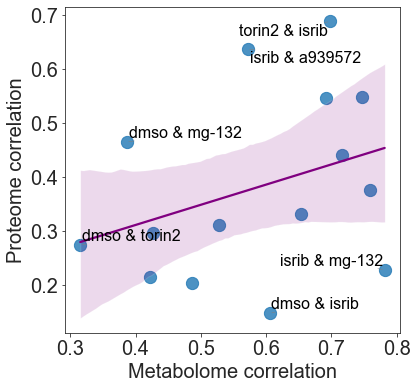

In [1082]:
from adjustText import adjust_text 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))

# Get data
meta_corr_unique = get_unique_from_square_df(df=meta_corr_df_vscon)
pro_corr_unique = get_unique_from_square_df(df=pro_corr_df_vscon)

x_values = meta_corr_unique.Value
y_values = pro_corr_unique.Value
labels_ome_corr = [f"{a} & {b}" for a, b in zip(meta_corr_unique['Row'], meta_corr_unique['Column'])]

plt.figure(figsize=(6, 6))

# Scatter plot with regression line
sns.regplot(x=x_values, y=y_values, scatter_kws={'s': 150}, line_kws={'color': 'purple'})

# Customize labels and tick font sizes
plt.xlabel("Metabolome correlation", fontsize=20)
plt.ylabel("Proteome correlation", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Add labels to selected points and store them in a list
texts = []
selected_indices = [1, 2, 4, 9, 12, 13]  # Replace with indices of points you want to label
for i in selected_indices:
    text = plt.text(x_values.iloc[i], y_values.iloc[i], labels_ome_corr[i], 
                    fontsize=16, color='black', ha='right')
    texts.append(text)  # Store text objects

# Adjust labels to avoid overlapping
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.savefig(f'{figure_save_path}/case2_meta_pro_correlation_scatter_regression.svg',dpi=800,bbox_inches='tight')
# Show the plot
plt.show()


In [788]:
# Create a mask for the upper triangle
def plot_heatmap_corr(corr_treatments = multi_corr, savename = "multi_corr_case2",figure = (8,8)):
    
    mask = np.triu(np.ones_like(corr_treatments, dtype=bool))
    
    # Set up the matplotlib figure
    plt.figure(figsize = figure)
    plt.rcParams['font.family'] = 'Arial'
    # Plot the heatmap with the mask
    ax = sns.heatmap(
        corr_treatments, 
        # mask=mask,  # Apply the mask
        cmap="viridis",  # Choose a colormap
        annot=True,  # Annotate the cells with correlation values
        fmt=".2f",   # Format the annotation
        annot_kws={"size": 16, "weight": "bold", "color": "white", "style": "italic"},
        square=True,  # Make cells square
        linewidths=0.5,  # Add space between cells
        cbar_kws={"shrink": 0.8}  # Shrink the color bar
    )
    # Retrieve the colorbar from the heatmap
    cbar = ax.collections[0].colorbar
    
    # Set colorbar tick parameters (for example, font size and color)
    cbar.ax.tick_params(labelsize=16, labelcolor='black') 
    
    plt.xticks( fontsize=22,rotation = 45)
    plt.yticks( fontsize=22,rotation = 45)
    # Add title and labels (optional)
    #plt.title("Triangle Heatmap")
    plt.savefig(f'{figure_save_path}/{savename}.svg',dpi=800,bbox_inches='tight')
    plt.show()

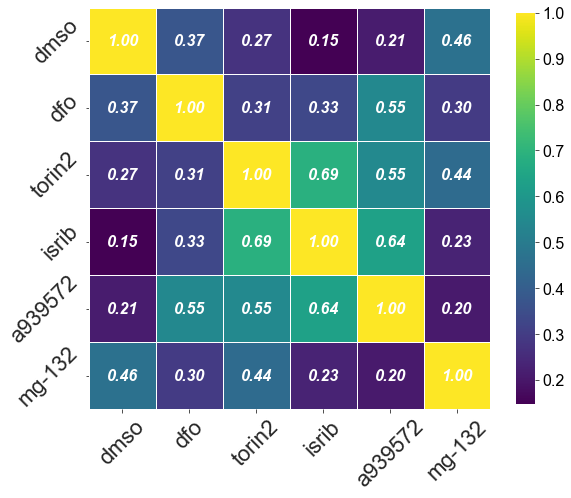

In [983]:
plot_heatmap_corr(corr_treatments = pro_corr_df_vscon, savename = "pro_corr_case2",figure = (9,9))

In [ ]:
#749AC4

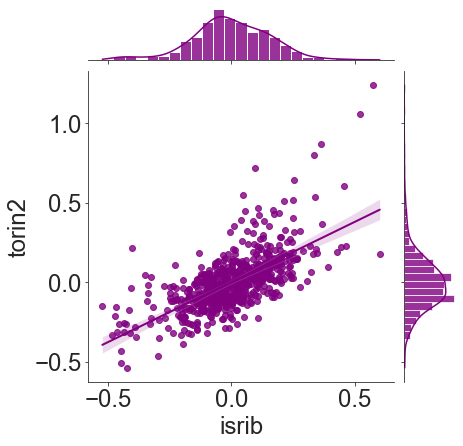

In [1022]:

g = sns.jointplot(data=pro_df_vscon, 
                  x="isrib", y="torin2", 
                  kind="reg", 
                  scatter_kws={'color': 'purple', 'alpha': 0.8},
                  line_kws={'color': 'purple', 'linewidth': 2},
                  marginal_kws={'color': 'purple', 'alpha': 0.8})

# Option 1: Set axis label fonts using set_xlabel/set_ylabel with fontsize (and family if desired)
g.ax_joint.set_xlabel("isrib", fontsize=24, fontfamily='Arial')
g.ax_joint.set_ylabel("torin2", fontsize=24, fontfamily='Arial')

# Option 2: Adjust tick label fonts on the joint axis
g.ax_joint.tick_params(axis='both', labelsize=24)

# If you want to change the tick font family too, you can iterate over the tick labels:
for tick in g.ax_joint.get_xticklabels():
    tick.set_fontfamily('Arial')
for tick in g.ax_joint.get_yticklabels():
    tick.set_fontfamily('Arial')
    
plt.savefig(f'{figure_save_path}/pro_jointplot_torinvsisrib.svg',dpi=800,bbox_inches='tight')
plt.show()

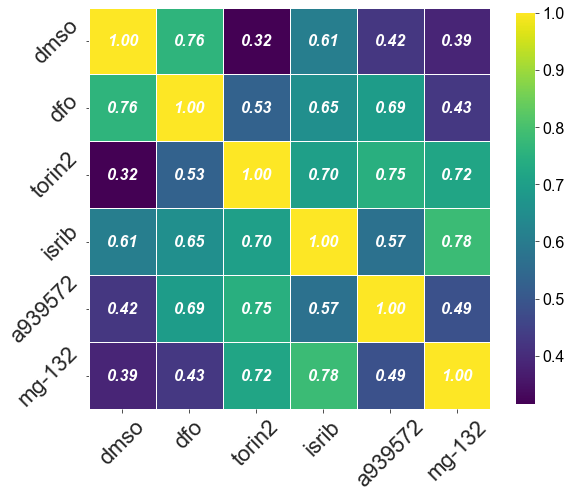

In [984]:
plot_heatmap_corr(corr_treatments = meta_corr_df_vscon, savename = "meta_corr_case2",figure = (9,9))

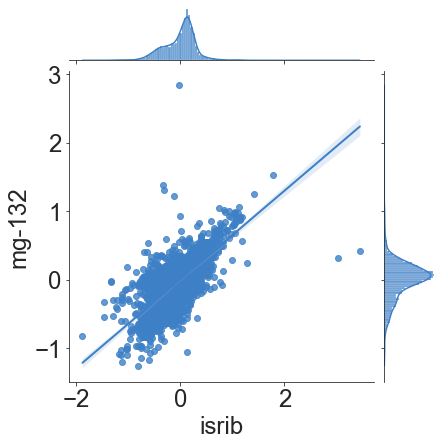

In [1023]:

g = sns.jointplot(data=meta_df_vscon, 
                  x="isrib", y="mg-132", 
                  kind="reg", 
                  scatter_kws={'color': '#3E80C6', 'alpha': 0.8},
                  line_kws={'color': '#3E80C6', 'linewidth': 2},
                  marginal_kws={'color': '#3E80C6', 'alpha': 0.8})

# Option 1: Set axis label fonts using set_xlabel/set_ylabel with fontsize (and family if desired)
g.ax_joint.set_xlabel("isrib", fontsize=24, fontfamily='Arial')
g.ax_joint.set_ylabel("mg-132", fontsize=24, fontfamily='Arial')

# Option 2: Adjust tick label fonts on the joint axis
g.ax_joint.tick_params(axis='both', labelsize=24)

# If you want to change the tick font family too, you can iterate over the tick labels:
for tick in g.ax_joint.get_xticklabels():
    tick.set_fontfamily('Arial')
for tick in g.ax_joint.get_yticklabels():
    tick.set_fontfamily('Arial')
    
plt.savefig(f'{figure_save_path}/meta_jointplot_mg132vsisrib.svg',dpi=800,bbox_inches='tight')
plt.show()

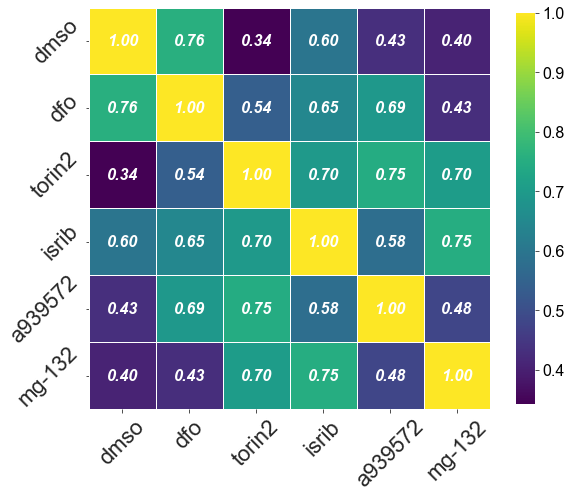

In [1004]:
plot_heatmap_corr(corr_treatments = multi_corr_df_vscon, savename = "multi_corr_spearman_case2",figure = (9,9))

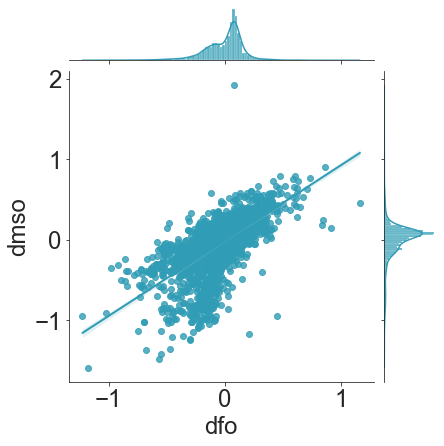

In [1025]:

g = sns.jointplot(data=meta_df_vscon, 
                  x="dfo", y="dmso", 
                  kind="reg", 
                  scatter_kws={'color': '#309CB5', 'alpha': 0.8},
                  line_kws={'color': '#309CB5', 'linewidth': 2},
                  marginal_kws={'color': '#309CB5', 'alpha': 0.8})

# Option 1: Set axis label fonts using set_xlabel/set_ylabel with fontsize (and family if desired)
g.ax_joint.set_xlabel("dfo", fontsize=24, fontfamily='Arial')
g.ax_joint.set_ylabel("dmso", fontsize=24, fontfamily='Arial')

# Option 2: Adjust tick label fonts on the joint axis
g.ax_joint.tick_params(axis='both', labelsize=24)

# If you want to change the tick font family too, you can iterate over the tick labels:
for tick in g.ax_joint.get_xticklabels():
    tick.set_fontfamily('Arial')
for tick in g.ax_joint.get_yticklabels():
    tick.set_fontfamily('Arial')
    
plt.savefig(f'{figure_save_path}/multi_jointplot_dfovsdmso.svg',dpi=800,bbox_inches='tight')
plt.show()

# input the identified m/z features from GNPS results 
fileslist = []
dir = 'E:\project 7_SMAD\meta_identification'
for file in os.listdir(dir):
    if file.endswith(".tsv"):
        fileslist.append(os.path.join(dir, file))
print(fileslist)

In [265]:
meta_293T=pd.read_csv(fileslist[2],delimiter="\t", header=0)
# filter the dataframe with 'MZErrorPPM' < 30 ppm

meta_293T_filter=meta_293T[meta_293T['MZErrorPPM'] < 30]

In [197]:
meta_293T_filter.columns

Index(['rowid', 'ccms_row_id', '#Scan#', 'Adduct', 'CAS_Number', 'Charge',
       'Compound_Name', 'Compound_Source', 'Data_Collector', 'ExactMass',
       'FileScanUniqueID', 'INCHI', 'INCHI_AUX', 'InChIKey', 'InChIKey-Planar',
       'Instrument', 'IonMode', 'Ion_Source', 'LibMZ', 'LibraryName',
       'LibraryQualityString', 'Library_Class', 'MQScore', 'MZErrorPPM',
       'MassDiff', 'MoleculeExplorerDatasets', 'MoleculeExplorerFiles',
       'NumberHits', 'Organism', 'PI', 'Precursor_MZ', 'Pubmed_ID', 'RT_Query',
       'SharedPeaks', 'Smiles', 'SpecCharge', 'SpecMZ', 'SpectrumFile',
       'SpectrumID', 'TIC_Query', 'UpdateWorkflowName', 'class',
       'full_CCMS_path', 'internalFilename', 'npclassifier_class',
       'npclassifier_pathway', 'npclassifier_superclass', 'subclass',
       'superclass', 'tags', 'id'],
      dtype='object')

In [198]:
meta_293T_filter['Precursor_MZ']

0      308.091
1      308.091
2      175.119
3      175.119
4      152.070
        ...   
415    332.331
416    674.512
418    544.337
419    219.140
422    782.567
Name: Precursor_MZ, Length: 324, dtype: float64

In [ ]:
final2 = df_meta_sig[df_meta_sig['mz_rounded'].isin (identified_mz_round)]

# clusters of proteins

# CV violin plot here, show the robustness of the SMAD method

In [16]:
df_antilog2_proteome = 2 ** df3
df_antilog2_proteome

df_antilog2_metabolome = 2 ** df_meta2 
df_antilog2_metabolome

NameError: name 'df_meta2' is not defined

In [14]:

def plot_cv(result=df_pro):
    cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100  # CV formula
    
    # Extract columns dynamically based on treatment names
    treatments = {
        'Con': [col for col in result.columns if "con_" in col.lower()],
        'Dmso': [col for col in result.columns if "dmso_" in col.lower()],
        'Dfo': [col for col in result.columns if "dfo_" in col.lower()],
        'Tori2': [col for col in result.columns if "tori_" in col.lower()],
        'Isrib': [col for col in result.columns if "isrib_" in col.lower()],
        'MG-132': [col for col in result.columns if "mg132_" in col.lower()],
        'A939572': [col for col in result.columns if "a9395_" in col.lower()]
    }

    # Compute CV for each treatment group
    newdf = {key: result[cols].T.apply(cv).tolist() for key, cols in treatments.items() if cols}

    # Convert to DataFrame
    uk = pd.DataFrame.from_dict(newdf, orient='index')
    um = uk.transpose()
    
    # Plot settings
    matplotlib.rcParams['font.family'] = "Arial"
    plt.figure(figsize=(7.5, 7))
    sns.set_style("ticks")
    
    custom_palette = ['#9B3A4D', '#E2AE79', '#497EB2', '#D0DCAA', '#8CBDA7', '#68AC57', '#70A0AC']
    sns.violinplot(data=um, palette=custom_palette)
    sns.stripplot(data=um, jitter=True, alpha=0.3, size=4, color="black")
    
    plt.ylabel('CV(%)', fontsize=26)
    plt.xticks(fontsize=26, rotation=30)
    plt.yticks(fontsize=30)
    plt.yticks(np.arange(0, 100, 50))
    plt.tick_params(axis='x', which='both', length=9)
    plt.grid()
    
    # Save plot
    # plt.savefig(r'D:\\project7_SMAD\\figure4_96well_multiomic_analysis\\Figure4_B.svg', dpi=1000)
    plt.show()

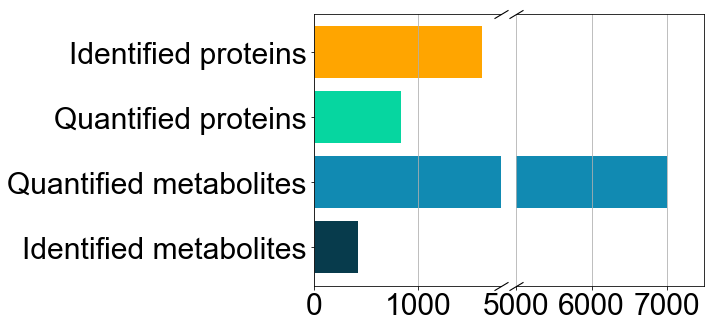

In [19]:
# Sample data
y = [ 'Identified metabolites','Quantified metabolites','Quantified proteins','Identified proteins' ]
x = np.array([425, 7005, 838, 1616])
colors = ['#073b4c', '#118ab2', '#06d6a0', 'orange']

plt.rcParams['font.family'] = 'Arial'
# set figure size

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(7,5)
# set font size
plt.rcParams.update({'font.size': 12})

# set tick font size
ax1.tick_params(axis='both', which='major', labelsize=30)
ax2.tick_params(axis='both', which='major', labelsize=30)


ax1.barh(y, x,color=colors)
ax1.set_xlim(0, 1800)
ax1.spines['right'].set_visible(False)
ax1.set_xticks(np.arange(0, 1800, 1000))

ax1.xaxis.grid(True)


ax2.barh(y, x,color=colors)
ax2.set_xlim(5000, 7500)
ax2.spines['left'].set_visible(False)
ax2.set_xticks(np.arange(5000, 7500, 1000))
ax2.yaxis.set_visible(False)
ax2.xaxis.grid(True)
# Set x-axis label
#ax.set_xlabel('Value')
d = .6  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=14,
              linestyle="none", color='k', mec='k', mew=1.1, clip_on=False)
ax1.plot([1, 1], [0, 1], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 0], [1, 0], transform=ax2.transAxes, **kwargs)

fig.subplots_adjust(wspace=0.08)

plt.savefig(f'{figure_save_path}/barplot_casestudy2_dataquality_multiome.svg',bbox_inches='tight',dpi = 1000)


# Show plot
plt.show()